In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
from cosmoblender import tools as tls
from cosmoblender import qest
from cosmoblender import biases

IMPORT ERROR: /Users/antonbaleatolizancos/Software/Quicklens-with-fixes/quicklens/mpi.py (No module named 'pypar'). Could not load pbs or pypar. MPI will not be used.
IMPORT ERROR: /Users/antonbaleatolizancos/Software/Quicklens-with-fixes/quicklens/shts/__init__.py (No module named 'fsht'). Try running 'python setup.py install' or 'python setup.py build_ext --inplace' from the quicklens directory.








Initialise experiment object

In [2]:
# Foreground cleaning? Only relevant if many frequencies are provided
MV_ILC_bool = True 
deproject_CIB = False
deproject_tSZ = False
fg_cleaning_dict = {'MV_ILC_bool':MV_ILC_bool, 'deproject_CIB':deproject_CIB, 'deproject_tSZ':deproject_tSZ}

In [3]:
SPT_properties = {'nlev_t': np.array([18.]),
                  'beam_size':np.array([1.]),
                  'freq_GHz': np.array([143.])}

# Initialise experiments with various different mass cuts
SPT_5e15 = qest.experiment(lmax = 3000, massCut_Mvir=5e15, **SPT_properties, **fg_cleaning_dict)

In [3]:
SO_properties = {'nlev_t': np.array([52., 27., 5.8, 6.3, 15., 37.]),
                 'beam_size':np.array([7.4, 5.1, 2.2, 1.4, 1.0, 0.9]),
                 'freq_GHz': np.array([27.3, 41.7, 93., 143., 225.,278.])}

# Initialise experiments with various different mass cuts
SO_5e15 = qest.experiment(lmax = 4000, massCut_Mvir=5e15, **SO_properties, **fg_cleaning_dict)

In [4]:
# Choose an experiment
experiment = SPT_5e15

One can later inspect the properties by doing

In [6]:
print(experiment)

Mass Cut: 5.00e+15  lmax: 4000  Beam FWHM: [7.4 5.1 2.2 1.4 1.  0.9] Noise (uK arcmin): [52.  27.   5.8  6.3 15.  37. ]  Freq (GHz): [ 27.3  41.7  93.  143.  225.  278. ]


Initialise halo model calculator

In [5]:
# You can specify a cosmological model -- in this case, match Websky
H0 = 68.
cosmoParams = {'As':2.08e-9,'ns':.965,'omch2':(0.31-0.049)*(H0/100.)**2,'ombh2':0.049*(H0/100.)**2,'tau':0.055,'H0':H0}

z_max = 3 #3
nZs = 20 #50
nMasses = 20  #30
Mmin = 1e8 #Keep this low -- the 2h term of the bispectrum bias can be sensitive to quite low-mass halos

# Set CIB halo model
cib_model='planck13'#'vierro'

# Initialise a halo model object for the calculation, using mostly default parameters
hm_calc = biases.hm_framework(cosmoParams=cosmoParams, m_min=Mmin, nZs=nZs, nMasses=nMasses, cib_model=cib_model, z_max=z_max)

Again, we can print out its properties

In [6]:
print(hm_calc)

M_min: 1.00e+12  M_max: 5.00e+16  n_Masses: 20
  z_min: 0.07  z_max: 3.00  n_zs: 20
  Mass function: sheth-torman  Mass definition: vir


# Calculate the biases

Run the main function for each of the mass cuts, and for either the tsz or cib calculation, using the FFTlog approach

Calculate and plot the biases

In [6]:
which_bias = 'tsz' # 'tsz' or 'cib' or 'mixed'

# Calculate secondary bispectrum bias? Note that this is slower that the other implemented terms
get_secondary_bispec_bias = True
parallelise_secondbispec = False

if which_bias=='tsz':
    hm_calc.get_tsz_auto_biases(experiment, get_secondary_bispec_bias=get_secondary_bispec_bias,
                                parallelise_secondbispec=parallelise_secondbispec)
if which_bias=='cib':
    hm_calc.get_cib_auto_biases(experiment, get_secondary_bispec_bias=get_secondary_bispec_bias,
                               parallelise_secondbispec=parallelise_secondbispec)
if which_bias=='mixed':
    hm_calc.get_mixed_auto_biases(experiment, get_secondary_bispec_bias=get_secondary_bispec_bias,
                                 parallelise_secondbispec=parallelise_secondbispec)

Launching parallel processes...
Now in parallel loop 0
Now in parallel loop 1
135.0
total 0.02611517906188965, exp_init 1.1920928955078125e-06, getlxly 0.0, shiftarray 0.004813671112060547, rectime 0.019965171813964844, firstinteg 0.0012371540069580078, secinteg 9.799003601074219e-05
385.0
total 0.020521879196166992, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.004679203033447266, rectime 0.014672994613647461, firstinteg 0.0010538101196289062, secinteg 0.00011491775512695312
635.0
total 0.018887042999267578, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.0028319358825683594, rectime 0.01499319076538086, firstinteg 0.0009617805480957031, secinteg 9.918212890625e-05
885.0
total 0.024065017700195312, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.008625984191894531, rectime 0.014309883117675781, firstinteg 0.0010302066802978516, secinteg 9.799003601074219e-05
1135.0
total 0.019813060760498047, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.00347280502

total 0.016772985458374023, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.002566099166870117, rectime 0.013228178024291992, firstinteg 0.000888824462890625, secinteg 8.893013000488281e-05
1635.0
total 0.014387845993041992, exp_init 2.86102294921875e-06, getlxly 0.0, shiftarray 0.002668142318725586, rectime 0.010755777359008789, firstinteg 0.0008802413940429688, secinteg 8.082389831542969e-05
1885.0
total 0.013916254043579102, exp_init 0.0, getlxly 1.1920928955078125e-06, shiftarray 0.0025970935821533203, rectime 0.010324954986572266, firstinteg 0.00090789794921875, secinteg 8.511543273925781e-05
2135.0
total 0.014568090438842773, exp_init 0.0, getlxly 1.1920928955078125e-06, shiftarray 0.0030558109283447266, rectime 0.010531187057495117, firstinteg 0.0008928775787353516, secinteg 8.702278137207031e-05
2385.0
total 0.017328977584838867, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.003565073013305664, rectime 0.010594844818115234, firstinteg 0.003050088882446289, sec

total 0.01612114906311035, exp_init 9.5367431640625e-07, getlxly 1.1920928955078125e-06, shiftarray 0.0033299922943115234, rectime 0.011801004409790039, firstinteg 0.0008997917175292969, secinteg 8.821487426757812e-05
2385.0885.0

total 0.013880014419555664, exp_init 9.5367431640625e-07, getlxly 1.1920928955078125e-06, shiftarray 0.002647876739501953, rectime 0.010162115097045898, firstinteg 0.0009598731994628906, secinteg 0.00010800361633300781
2635.0
total 0.017264127731323242, exp_init 9.5367431640625e-07, getlxly 9.5367431640625e-07, shiftarray 0.003814220428466797, rectime 0.012525796890258789, firstinteg 0.0008552074432373047, secinteg 6.699562072753906e-05
1135.0
total 0.019301891326904297, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.0033311843872070312, rectime 0.011210918426513672, firstinteg 0.004639148712158203, secinteg 0.00011968612670898438
total 0.015105962753295898, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.0027120113372802734, rectime 0.011256

total 0.02467179298400879, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.003361940383911133, rectime 0.02026224136352539, firstinteg 0.0009279251098632812, secinteg 0.00011873245239257812total 0.0201108455657959, exp_init 0.0, getlxly 1.1920928955078125e-06, shiftarray 0.0030868053436279297, rectime 0.016025066375732422, firstinteg 0.0009019374847412109, secinteg 9.584426879882812e-05

1385.0635.0

total 0.01751232147216797, exp_init 0.0, getlxly 1.1920928955078125e-06, shiftarray 0.0030918121337890625, rectime 0.013288259506225586, firstinteg 0.0009768009185791016, secinteg 0.00015425682067871094total 0.017061948776245117, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.002407073974609375, rectime 0.013657093048095703, firstinteg 0.0009069442749023438, secinteg 8.988380432128906e-05
1635.0

885.0
total 0.01434183120727539, exp_init 0.0, getlxly 1.1920928955078125e-06, shiftarray 0.003392934799194336, rectime 0.009959936141967773, firstinteg 0.0008997917175292969, sec

total 0.02095484733581543, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.002892732620239258, rectime 0.01682424545288086, firstinteg 0.001127004623413086, secinteg 0.00010991096496582031
385.0total 0.027991056442260742, exp_init 9.5367431640625e-07, getlxly 9.5367431640625e-07, shiftarray 0.0031719207763671875, rectime 0.021255970001220703, firstinteg 0.0034551620483398438, secinteg 0.00010609626770019531

385.0
total 0.018378019332885742, exp_init 1.1920928955078125e-06, getlxly 0.0, shiftarray 0.002772808074951172, rectime 0.014855384826660156, firstinteg 0.0006928443908691406, secinteg 5.5789947509765625e-05
total 0.018146991729736328, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.0030112266540527344, rectime 0.012259721755981445, firstinteg 0.002732992172241211, secinteg 0.00014209747314453125635.0

635.0
total 0.018872976303100586, exp_init 1.9073486328125e-06, getlxly 1.1920928955078125e-06, shiftarray 0.0039098262786865234, rectime 0.013847112655639648, first

total 0.0825951099395752, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.0026361942291259766, rectime 0.07888197898864746, firstinteg 0.000982046127319336, secinteg 9.393692016601562e-05
total 0.0640859603881836, exp_init 9.5367431640625e-07, getlxly 7.152557373046875e-07, shiftarray 0.0025300979614257812, rectime 0.0603179931640625, firstinteg 0.0011420249938964844, secinteg 9.417533874511719e-05
2135.0
total 0.053598880767822266, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.0025348663330078125, rectime 0.0500330924987793, firstinteg 0.0009438991546630859, secinteg 8.606910705566406e-05
2385.0
total 0.06551003456115723, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.0027599334716796875, rectime 0.06170010566711426, firstinteg 0.0009522438049316406, secinteg 9.679794311523438e-05
2635.0
total 0.07229900360107422, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.002485990524291992, rectime 0.0687570571899414, firstinteg 0.0009558200836181641, secinteg

total 0.04471588134765625, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.0030579566955566406, rectime 0.04050397872924805, firstinteg 0.0010440349578857422, secinteg 0.00010895729064941406
2385.0
total 0.055348873138427734, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.002969026565551758, rectime 0.0469052791595459, firstinteg 0.0053157806396484375, secinteg 0.00015783309936523438total 0.050794363021850586, exp_init 1.1920928955078125e-06, getlxly 0.0, shiftarray 0.0031270980834960938, rectime 0.04661083221435547, firstinteg 0.0009591579437255859, secinteg 9.608268737792969e-05

1385.02635.0

total 0.03987717628479004, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.002995014190673828, rectime 0.03593707084655762, firstinteg 0.0007579326629638672, secinteg 0.0001862049102783203
1635.0
total 0.05204200744628906, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.0031549930572509766, rectime 0.04518294334411621, firstinteg 0.003512144088745117, secinteg 0

total 0.03793787956237793, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.0025491714477539062, rectime 0.03400397300720215, firstinteg 0.0012478828430175781, secinteg 0.00013589859008789062total 0.06391716003417969, exp_init 0.0, getlxly 1.1920928955078125e-06, shiftarray 0.005489826202392578, rectime 0.05353212356567383, firstinteg 0.00465703010559082, secinteg 0.00023698806762695312

885.01385.0

total 0.022214174270629883, exp_init 0.0, getlxly 1.1920928955078125e-06, shiftarray 0.0032601356506347656, rectime 0.016435861587524414, firstinteg 0.0022339820861816406, secinteg 0.0002830028533935547
1635.0
total 0.04124283790588379, exp_init 0.0, getlxly 1.1920928955078125e-06, shiftarray 0.007272958755493164, rectime 0.0325467586517334, firstinteg 0.0013339519500732422, secinteg 8.797645568847656e-05
1135.0
total 0.019616127014160156, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.007376909255981445, rectime 0.011167049407958984, firstinteg 0.000965118408203125, secint

total 0.02309393882751465, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.002816915512084961, rectime 0.01874995231628418, firstinteg 0.0014133453369140625, secinteg 0.00011277198791503906
385.0
total 0.03465867042541504, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.008331060409545898, rectime 0.02532482147216797, firstinteg 0.0009169578552246094, secinteg 8.487701416015625e-05total 0.018848180770874023, exp_init 0.0, getlxly 1.1920928955078125e-06, shiftarray 0.0027189254760742188, rectime 0.014921903610229492, firstinteg 0.0011048316955566406, secinteg 0.00010132789611816406

635.0635.0

total 0.017885208129882812, exp_init 1.1920928955078125e-06, getlxly 9.5367431640625e-07, shiftarray 0.0027132034301757812, rectime 0.01420283317565918, firstinteg 0.0008840560913085938, secinteg 8.296966552734375e-05
total 0.020884037017822266, exp_init 1.1920928955078125e-06, getlxly 0.0, shiftarray 0.006126880645751953, rectime 0.013768196105957031, firstinteg 0.000896930694580

total 0.09027099609375, exp_init 1.1920928955078125e-06, getlxly 0.0, shiftarray 0.00469970703125, rectime 0.08381128311157227, firstinteg 0.0012290477752685547, secinteg 0.00052976608276367192635.0

2385.0
total 0.027837038040161133, exp_init 9.5367431640625e-07, getlxly 1.1920928955078125e-06, shiftarray 0.004143714904785156, rectime 0.022710084915161133, firstinteg 0.0008943080902099609, secinteg 8.678436279296875e-05
2635.0total 0.05266427993774414, exp_init 1.1920928955078125e-06, getlxly 0.0, shiftarray 0.003818035125732422, rectime 0.046929121017456055, firstinteg 0.0018198490142822266, secinteg 9.608268737792969e-05

total 0.01869988441467285, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.004135847091674805, rectime 0.013555049896240234, firstinteg 0.0009000301361083984, secinteg 0.00010800361633300781
135.0135.0

total 0.028627872467041016, exp_init 0.0, getlxly 1.9073486328125e-06, shiftarray 0.00482487678527832, rectime 0.022408246994018555, firstinteg 0.0012779235

total 0.022340059280395508, exp_init 0.0, getlxly 1.1920928955078125e-06, shiftarray 0.003142833709716797, rectime 0.018146038055419922, firstinteg 0.0009300708770751953, secinteg 0.00011992454528808594
1885.0
total 0.019253015518188477, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.0028181076049804688, rectime 0.015103816986083984, firstinteg 0.0012052059173583984, secinteg 0.00012493133544921875
2135.0
total 0.016920089721679688, exp_init 0.0, getlxly 1.1920928955078125e-06, shiftarray 0.002878904342651367, rectime 0.012661933898925781, firstinteg 0.0011091232299804688, secinteg 0.0002689361572265625
2135.0
total 0.02218008041381836, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.0025200843811035156, rectime 0.018626928329467773, firstinteg 0.0009472370147705078, secinteg 8.487701416015625e-05
2385.0total 0.014959335327148438, exp_init 0.0, getlxly 1.1920928955078125e-06, shiftarray 0.0028111934661865234, rectime 0.011140823364257812, firstinteg 0.00090479850769042

1135.0total 0.02435016632080078, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.002593994140625, rectime 0.020692110061645508, firstinteg 0.0009670257568359375, secinteg 9.608268737792969e-05

1385.0
total 0.01992487907409668, exp_init 9.5367431640625e-07, getlxly 9.5367431640625e-07, shiftarray 0.004169940948486328, rectime 0.014394283294677734, firstinteg 0.0012657642364501953, secinteg 9.298324584960938e-05total 0.01768803596496582, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.0024039745330810547, rectime 0.014199018478393555, firstinteg 0.0009341239929199219, secinteg 0.0001499652862548828

1385.01635.0

total 0.014555215835571289, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.002886056900024414, rectime 0.010499954223632812, firstinteg 0.0010731220245361328, secinteg 9.512901306152344e-05
total 0.017076969146728516, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.0034470558166503906, rectime 0.012597084045410156, firstinteg 0.00093269348144531

total 0.015220403671264648, exp_init 0.0, getlxly 1.1920928955078125e-06, shiftarray 0.0029401779174804688, rectime 0.010158777236938477, firstinteg 0.002025127410888672, secinteg 9.512901306152344e-05
total 0.0150299072265625, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.0027768611907958984, rectime 0.011254072189331055, firstinteg 0.0009109973907470703, secinteg 8.702278137207031e-05885.0

635.0
total 0.018269062042236328, exp_init 1.1920928955078125e-06, getlxly 9.5367431640625e-07, shiftarray 0.0032110214233398438, rectime 0.013890743255615234, firstinteg 0.0010731220245361328, secinteg 9.202957153320312e-05total 0.015246152877807617, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.002553224563598633, rectime 0.01045083999633789, firstinteg 0.0021409988403320312, secinteg 0.00010013580322265625

1135.0885.0

total 0.01646733283996582, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.0025882720947265625, rectime 0.011533737182617188, firstinteg 0.0021991729

2635.0total 0.01808309555053711, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.004895925521850586, rectime 0.01211404800415039, firstinteg 0.000965118408203125, secinteg 0.00010704994201660156

total 0.015005111694335938, exp_init 1.1920928955078125e-06, getlxly 0.0, shiftarray 0.003343820571899414, rectime 0.010694026947021484, firstinteg 0.0008809566497802734, secinteg 8.511543273925781e-05
135.0
total 0.020657062530517578, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.0027670860290527344, rectime 0.015503883361816406, firstinteg 0.002262115478515625, secinteg 0.00012302398681640625
385.0
135.0
total 0.01656031608581543, exp_init 1.1920928955078125e-06, getlxly 0.0, shiftarray 0.002513885498046875, rectime 0.013021230697631836, firstinteg 0.0009279251098632812, secinteg 9.608268737792969e-05
635.0
total 0.029551982879638672, exp_init 1.9073486328125e-06, getlxly 1.1920928955078125e-06, shiftarray 0.004645824432373047, rectime 0.02283310890197754, firstinteg 0.0019

total 0.015903949737548828, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.00436711311340332, rectime 0.010469913482666016, firstinteg 0.0009829998016357422, secinteg 8.296966552734375e-05
2135.0
total 0.019109249114990234, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.004143238067626953, rectime 0.013595819473266602, firstinteg 0.0012500286102294922, secinteg 0.00011920928955078125
2385.0
total 0.012878894805908203, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.0030460357666015625, rectime 0.008828878402709961, firstinteg 0.0009102821350097656, secinteg 9.274482727050781e-05
total 0.021120071411132812, exp_init 1.1920928955078125e-06, getlxly 0.0, shiftarray 0.0026209354400634766, rectime 0.01705312728881836, firstinteg 0.001322031021118164, secinteg 0.00012278556823730472385.0

2635.0
total 0.04588794708251953, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.0029299259185791016, rectime 0.0416712760925293, firstinteg 0.0011818408966064453, secinte

1385.0total 0.051397085189819336, exp_init 1.1920928955078125e-06, getlxly 9.5367431640625e-07, shiftarray 0.03865694999694824, rectime 0.011688947677612305, firstinteg 0.0009410381317138672, secinteg 0.00010800361633300781

1635.0
total 0.04304790496826172, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.004369974136352539, rectime 0.03756427764892578, firstinteg 0.001008749008178711, secinteg 0.00010395050048828125
1635.0
total 0.038294076919555664, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.003699064254760742, rectime 0.033551692962646484, firstinteg 0.0009484291076660156, secinteg 9.393692016601562e-05
1885.0
total 0.049685001373291016, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.0031232833862304688, rectime 0.04554581642150879, firstinteg 0.0009291172027587891, secinteg 8.58306884765625e-05
1885.0
total 0.030375003814697266, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.0026640892028808594, rectime 0.026669025421142578, firstinteg 0.00094

total 0.017609357833862305, exp_init 1.1920928955078125e-06, getlxly 0.0, shiftarray 0.0032041072845458984, rectime 0.013414859771728516, firstinteg 0.0008950233459472656, secinteg 9.417533874511719e-05
885.0885.0

total 0.01317596435546875, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.0025680065155029297, rectime 0.009568929672241211, firstinteg 0.0009438991546630859, secinteg 9.417533874511719e-05total 0.015631914138793945, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.0026509761810302734, rectime 0.011752128601074219, firstinteg 0.0011217594146728516, secinteg 0.00010609626770019531

1135.0
1135.0
total 0.02077627182006836, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.004165172576904297, rectime 0.015568017959594727, firstinteg 0.0009608268737792969, secinteg 8.130073547363281e-05total 0.01638484001159668, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.0029659271240234375, rectime 0.012133121490478516, firstinteg 0.0010597705841064453, secint

total 0.04627680778503418, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.0024559497833251953, rectime 0.030173063278198242, firstinteg 0.0009732246398925781, secinteg 0.012673616409301758total 0.026823997497558594, exp_init 1.1920928955078125e-06, getlxly 0.0, shiftarray 0.002672910690307617, rectime 0.023128032684326172, firstinteg 0.0009210109710693359, secinteg 0.00010085105895996094

885.0
2385.0
total 0.02532196044921875, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.0030329227447509766, rectime 0.021183252334594727, firstinteg 0.0010056495666503906, secinteg 9.918212890625e-05
2635.0
total 0.016873836517333984, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.003641843795776367, rectime 0.011867046356201172, firstinteg 0.001230001449584961, secinteg 0.00013399124145507812
total 0.09727883338928223, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.0034246444702148438, rectime 0.09281325340270996, firstinteg 0.0009539127349853516, secinteg 8.606910

total 0.07553935050964355, exp_init 1.1920928955078125e-06, getlxly 0.0, shiftarray 0.00615692138671875, rectime 0.0681920051574707, firstinteg 0.0010800361633300781, secinteg 0.00010919570922851562
2135.0
total 0.14030098915100098, exp_init 9.5367431640625e-07, getlxly 1.1920928955078125e-06, shiftarray 0.08995771408081055, rectime 0.04926013946533203, firstinteg 0.0009839534759521484, secinteg 9.703636169433594e-05
2635.0
total 0.03610110282897949, exp_init 0.0, getlxly 1.1920928955078125e-06, shiftarray 0.003761768341064453, rectime 0.03030228614807129, firstinteg 0.00189971923828125, secinteg 0.0001361370086669922
2385.0
total 0.07748079299926758, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.004096031188964844, rectime 0.07234001159667969, firstinteg 0.0009567737579345703, secinteg 8.702278137207031e-05
total 0.0862569808959961, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.0033609867095947266, rectime 0.0802011489868164, firstinteg 0.0025577545166015625, secin

total 0.04792618751525879, exp_init 0.0, getlxly 1.1920928955078125e-06, shiftarray 0.0037567615509033203, rectime 0.0431370735168457, firstinteg 0.0009369850158691406, secinteg 9.417533874511719e-05total 0.0323939323425293, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.0031371116638183594, rectime 0.028177738189697266, firstinteg 0.0009930133819580078, secinteg 8.511543273925781e-05

1385.0
1885.0
total 0.014996051788330078, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.0027399063110351562, rectime 0.010564088821411133, firstinteg 0.0015718936920166016, secinteg 0.00011920928955078125
1635.0
total 0.016556262969970703, exp_init 0.0, getlxly 1.1920928955078125e-06, shiftarray 0.002608776092529297, rectime 0.012911081314086914, firstinteg 0.0009529590606689453, secinteg 8.225440979003906e-05
2135.0
total 0.036081790924072266, exp_init 7.152557373046875e-07, getlxly 0.0, shiftarray 0.0032351016998291016, rectime 0.031404972076416016, firstinteg 0.0013499259948730469, 

total 0.016204833984375, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.004759073257446289, rectime 0.010390043258666992, firstinteg 0.0009248256683349609, secinteg 0.00012993812561035156
1135.0
total 0.017368793487548828, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.0027170181274414062, rectime 0.01226806640625, firstinteg 0.002187967300415039, secinteg 0.00019478797912597656
885.0
total 0.02841019630432129, exp_init 0.0, getlxly 1.1920928955078125e-06, shiftarray 0.0035109519958496094, rectime 0.02388787269592285, firstinteg 0.0009279251098632812, secinteg 8.225440979003906e-05total 0.018776893615722656, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.0029420852661132812, rectime 0.014773130416870117, firstinteg 0.00096893310546875, secinteg 9.179115295410156e-05

1135.01385.0

total 0.014800310134887695, exp_init 1.1920928955078125e-06, getlxly 0.0, shiftarray 0.002563953399658203, rectime 0.010657072067260742, firstinteg 0.0010960102081298828, secinteg 0

total 0.029015064239501953, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.004964113235473633, rectime 0.01805400848388672, firstinteg 0.005867958068847656, secinteg 0.00012803077697753906
total 0.033174991607666016, exp_init 2.1457672119140625e-06, getlxly 9.5367431640625e-07, shiftarray 0.008664131164550781, rectime 0.02334284782409668, firstinteg 0.0010590553283691406, secinteg 0.00010585784912109375
385.0
385.0total 0.014492988586425781, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.0028188228607177734, rectime 0.010689973831176758, firstinteg 0.0008962154388427734, secinteg 8.702278137207031e-05

total 0.01754307746887207, exp_init 0.0, getlxly 1.1920928955078125e-06, shiftarray 0.002725839614868164, rectime 0.013879060745239258, firstinteg 0.0008518695831298828, secinteg 8.511543273925781e-05635.0

635.0
total 0.018164873123168945, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.004790067672729492, rectime 0.012119054794311523, firstinteg 0.001169919967

total 0.02553081512451172, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.003445148468017578, rectime 0.021046876907348633, firstinteg 0.0009448528289794922, secinteg 9.298324584960938e-05
2635.0
total 0.020731210708618164, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.003898143768310547, rectime 0.015698909759521484, firstinteg 0.001032114028930664, secinteg 0.0001010894775390625
2385.0
total 0.015805959701538086, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.0036780834197998047, rectime 0.011122941970825195, firstinteg 0.0009100437164306641, secinteg 9.393692016601562e-05
total 0.03696584701538086, exp_init 1.1920928955078125e-06, getlxly 0.0, shiftarray 0.0034139156341552734, rectime 0.03249692916870117, firstinteg 0.0009551048278808594, secinteg 9.870529174804688e-052635.0

total 0.030393123626708984, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.0025162696838378906, rectime 0.02206587791442871, firstinteg 0.0057048797607421875, secinteg 0.000

total 0.01793980598449707, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.004350900650024414, rectime 0.012521982192993164, firstinteg 0.0009593963623046875, secinteg 0.00010657310485839844
635.0
total 0.025236129760742188, exp_init 1.1920928955078125e-06, getlxly 9.5367431640625e-07, shiftarray 0.004148960113525391, rectime 0.01987314224243164, firstinteg 0.0011126995086669922, secinteg 9.918212890625e-05
885.0
total 0.017543315887451172, exp_init 1.1920928955078125e-06, getlxly 9.5367431640625e-07, shiftarray 0.003361940383911133, rectime 0.013169050216674805, firstinteg 0.0009169578552246094, secinteg 9.322166442871094e-05
1135.0
Now in parallel loop 6
total 0.03280496597290039, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.002994060516357422, rectime 0.0287630558013916, firstinteg 0.0009548664093017578, secinteg 9.202957153320312e-05
1385.0
total 0.028326988220214844, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.00590205192565918, rectime 0.02137088775

total 0.0284731388092041, exp_init 1.1920928955078125e-06, getlxly 0.0, shiftarray 0.0033388137817382812, rectime 0.024070024490356445, firstinteg 0.0009670257568359375, secinteg 9.608268737792969e-05
2635.0
total 0.05103802680969238, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.006078958511352539, rectime 0.04348015785217285, firstinteg 0.0013408660888671875, secinteg 0.00013709068298339844total 0.017520904541015625, exp_init 9.5367431640625e-07, getlxly 1.1920928955078125e-06, shiftarray 0.0060007572174072266, rectime 0.010447263717651367, firstinteg 0.0009620189666748047, secinteg 0.0001087188720703125

2385.0
total 0.023459196090698242, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.002955198287963867, rectime 0.01947784423828125, firstinteg 0.000946044921875, secinteg 7.915496826171875e-05
2635.0
total 0.0163419246673584, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.002735137939453125, rectime 0.012423038482666016, firstinteg 0.0010869503021240234, s

1635.0total 0.015778064727783203, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.0028879642486572266, rectime 0.011857032775878906, firstinteg 0.0009300708770751953, secinteg 0.00010204315185546875

1885.0
total 0.015466690063476562, exp_init 7.152557373046875e-07, getlxly 0.0, shiftarray 0.002753019332885742, rectime 0.011701107025146484, firstinteg 0.0009200572967529297, secinteg 9.179115295410156e-05
2135.0
total 0.05140566825866699, exp_init 7.152557373046875e-07, getlxly 0.0, shiftarray 0.00697016716003418, rectime 0.0432889461517334, firstinteg 0.0010530948638916016, secinteg 9.274482727050781e-05total 0.01689910888671875, exp_init 1.1920928955078125e-06, getlxly 0.0, shiftarray 0.002885103225708008, rectime 0.01228785514831543, firstinteg 0.0016009807586669922, secinteg 0.0001239776611328125
2385.0

1885.0
total 0.020221948623657227, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.0035409927368164062, rectime 0.0155029296875, firstinteg 0.00109100341796875, seci

total 0.015465021133422852, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.002604961395263672, rectime 0.01188206672668457, firstinteg 0.0008897781372070312, secinteg 8.726119995117188e-05total 0.01568317413330078, exp_init 1.1920928955078125e-06, getlxly 0.0, shiftarray 0.002744913101196289, rectime 0.011809825897216797, firstinteg 0.0010230541229248047, secinteg 0.00010418891906738281

1385.01135.0

total 0.015182018280029297, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.0025768280029296875, rectime 0.011625051498413086, firstinteg 0.0008780956268310547, secinteg 0.0001010894775390625total 0.015256166458129883, exp_init 1.1920928955078125e-06, getlxly 0.0, shiftarray 0.0025599002838134766, rectime 0.011687994003295898, firstinteg 0.0009150505065917969, secinteg 9.202957153320312e-05

1635.01385.0

total 0.014178037643432617, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.002644062042236328, rectime 0.009242057800292969, firstinteg 0.0018608570098876953, s

total 0.016952037811279297, exp_init 9.5367431640625e-07, getlxly 9.5367431640625e-07, shiftarray 0.003286123275756836, rectime 0.012621164321899414, firstinteg 0.0009379386901855469, secinteg 0.0001049041748046875
635.0
385.0
total 0.02452707290649414, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.003412961959838867, rectime 0.020111083984375, firstinteg 0.0009171962738037109, secinteg 8.487701416015625e-05
total 0.019153833389282227, exp_init 9.5367431640625e-07, getlxly 7.152557373046875e-07, shiftarray 0.0035791397094726562, rectime 0.014471054077148438, firstinteg 0.0009860992431640625, secinteg 0.00011587142944335938885.0

635.0
total 0.01706695556640625, exp_init 0.0, getlxly 1.1920928955078125e-06, shiftarray 0.0025436878204345703, rectime 0.011374235153198242, firstinteg 0.0030279159545898438, secinteg 0.00011992454528808594total 0.02125382423400879, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.0048220157623291016, rectime 0.015394926071166992, firstinteg 

total 0.012052774429321289, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.001960277557373047, rectime 0.008929729461669922, firstinteg 0.001046895980834961, secinteg 0.00011491775512695312
2385.0
total 0.015764951705932617, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.0030889511108398438, rectime 0.011755943298339844, firstinteg 0.0008361339569091797, secinteg 8.296966552734375e-05
2635.0
total 0.016952037811279297, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.003046274185180664, rectime 0.012967824935913086, firstinteg 0.0008549690246582031, secinteg 8.20159912109375e-05
135.0
135.0total 0.024944782257080078, exp_init 0.0, getlxly 7.152557373046875e-07, shiftarray 0.002805948257446289, rectime 0.020488262176513672, firstinteg 0.0015649795532226562, secinteg 8.487701416015625e-05

385.0total 0.03037428855895996, exp_init 1.1920928955078125e-06, getlxly 0.0, shiftarray 0.005076885223388672, rectime 0.024106979370117188, firstinteg 0.0010991096496582031, s

total 0.014229059219360352, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.0028569698333740234, rectime 0.010303974151611328, firstinteg 0.0009620189666748047, secinteg 0.00010514259338378906
2385.0
total 0.017837047576904297, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.003216981887817383, rectime 0.013482809066772461, firstinteg 0.001039266586303711, secinteg 9.703636169433594e-05
2635.0
total 0.04688000679016113, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.012545108795166016, rectime 0.03273200988769531, firstinteg 0.0015039443969726562, secinteg 9.799003601074219e-05total 0.017640113830566406, exp_init 7.152557373046875e-07, getlxly 0.0, shiftarray 0.003875255584716797, rectime 0.01273488998413086, firstinteg 0.0009362697601318359, secinteg 9.298324584960938e-05

1885.0
total 0.017309904098510742, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.0029098987579345703, rectime 0.013417959213256836, firstinteg 0.0008893013000488281, secinteg 9.179

total 0.02056288719177246, exp_init 9.5367431640625e-07, getlxly 1.1920928955078125e-06, shiftarray 0.0031838417053222656, rectime 0.016288042068481445, firstinteg 0.0009808540344238281, secinteg 0.00010800361633300781
1635.0
total 0.016817331314086914, exp_init 0.0, getlxly 1.1920928955078125e-06, shiftarray 0.0033850669860839844, rectime 0.012240886688232422, firstinteg 0.0010728836059570312, secinteg 0.00011730194091796875
total 0.01489710807800293, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.002711057662963867, rectime 0.011101007461547852, firstinteg 0.0009870529174804688, secinteg 9.703636169433594e-051385.0

1885.0
total 0.01875615119934082, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.003426074981689453, rectime 0.014226913452148438, firstinteg 0.0010008811950683594, secinteg 0.00010132789611816406total 0.016041040420532227, exp_init 0.0, getlxly 0.0, shiftarray 0.002084970474243164, rectime 0.011703014373779297, firstinteg 0.0021228790283203125, secinteg

total 0.015856266021728516, exp_init 1.1920928955078125e-06, getlxly 0.0, shiftarray 0.0036330223083496094, rectime 0.01116800308227539, firstinteg 0.0009589195251464844, secinteg 9.512901306152344e-05total 0.01960587501525879, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.0036118030548095703, rectime 0.014966011047363281, firstinteg 0.0008962154388427734, secinteg 0.0001308917999267578

635.01135.0

total 0.021130084991455078, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.0072209835052490234, rectime 0.0126800537109375, firstinteg 0.0011088848114013672, secinteg 0.00011920928955078125total 0.01645803451538086, exp_init 1.1920928955078125e-06, getlxly 9.5367431640625e-07, shiftarray 0.004121065139770508, rectime 0.011304855346679688, firstinteg 0.0009260177612304688, secinteg 0.00010395050048828125

1385.0
885.0
total 0.018906116485595703, exp_init 0.0, getlxly 1.1920928955078125e-06, shiftarray 0.005842924118041992, rectime 0.012274980545043945, firstinteg 0.000725

total 0.028735876083374023, exp_init 7.152557373046875e-07, getlxly 0.0, shiftarray 0.0030541419982910156, rectime 0.024614810943603516, firstinteg 0.0009610652923583984, secinteg 0.00010514259338378906
135.0
135.0
total 0.02385687828063965, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.0031270980834960938, rectime 0.019598007202148438, firstinteg 0.0010409355163574219, secinteg 8.988380432128906e-05
385.0
total 0.015667200088500977, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.002989053726196289, rectime 0.011530160903930664, firstinteg 0.0010406970977783203, secinteg 0.00010633468627929688total 0.03431892395019531, exp_init 1.1920928955078125e-06, getlxly 0.0, shiftarray 0.0028595924377441406, rectime 0.03017425537109375, firstinteg 0.0011899471282958984, secinteg 9.393692016601562e-05

635.0385.0

total 0.014947891235351562, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.003504037857055664, rectime 0.010332107543945312, firstinteg 0.0010218620300292969,

total 0.023178815841674805, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.002791881561279297, rectime 0.017367124557495117, firstinteg 0.00290679931640625, secinteg 0.00011205673217773438total 0.014941930770874023, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.0031151771545410156, rectime 0.010437965393066406, firstinteg 0.0012729167938232422, secinteg 0.00011491775512695312

2385.0
2385.0
total 0.014038801193237305, exp_init 7.152557373046875e-07, getlxly 0.0, shiftarray 0.003718137741088867, rectime 0.009351015090942383, firstinteg 0.0008859634399414062, secinteg 8.296966552734375e-05
2635.0
total 0.05164694786071777, exp_init 0.0, getlxly 1.1920928955078125e-06, shiftarray 0.0021119117736816406, rectime 0.04853081703186035, firstinteg 0.0009152889251708984, secinteg 8.7738037109375e-05
total 0.015163898468017578, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.003120899200439453, rectime 0.010082244873046875, firstinteg 0.0018429756164550781, secinteg 0.0

total 0.015851974487304688, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.0027570724487304688, rectime 0.011860847473144531, firstinteg 0.0011262893676757812, secinteg 0.0001068115234375
1635.01635.0

total 0.015820980072021484, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.003737926483154297, rectime 0.010467052459716797, firstinteg 0.0014901161193847656, secinteg 0.00012493133544921875
total 0.015758991241455078, exp_init 0.0, getlxly 1.1920928955078125e-06, shiftarray 0.004086971282958984, rectime 0.010605812072753906, firstinteg 0.0009629726409912109, secinteg 0.00010204315185546875
1885.01885.0

total 0.018878936767578125, exp_init 0.0, getlxly 1.1920928955078125e-06, shiftarray 0.005380868911743164, rectime 0.01170802116394043, firstinteg 0.0016961097717285156, secinteg 9.274482727050781e-05
total 0.021032094955444336, exp_init 0.0, getlxly 1.1920928955078125e-06, shiftarray 0.0054018497467041016, rectime 0.014470100402832031, firstinteg 0.0010428428649902344,

total 0.016411781311035156, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.002785205841064453, rectime 0.012417793273925781, firstinteg 0.0011169910430908203, secinteg 9.083747863769531e-05
885.0
total 0.02650308609008789, exp_init 1.1920928955078125e-06, getlxly 0.0, shiftarray 0.0031900405883789062, rectime 0.021483898162841797, firstinteg 0.0016980171203613281, secinteg 0.00012993812561035156total 0.011038064956665039, exp_init 7.152557373046875e-07, getlxly 0.0, shiftarray 0.002554178237915039, rectime 0.007272958755493164, firstinteg 0.0011010169982910156, secinteg 0.00010919570922851562

1135.0
1385.0
total 0.02208423614501953, exp_init 9.5367431640625e-07, getlxly 1.1920928955078125e-06, shiftarray 0.003793954849243164, rectime 0.016766786575317383, firstinteg 0.0014102458953857422, secinteg 0.00011110305786132812
1385.0
total 0.01633286476135254, exp_init 2.86102294921875e-06, getlxly 9.5367431640625e-07, shiftarray 0.002788066864013672, rectime 0.011867046356201172, f

total 0.019569873809814453, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.0028841495513916016, rectime 0.01547694206237793, firstinteg 0.0011126995086669922, secinteg 9.512901306152344e-05
385.0385.0

total 0.01265406608581543, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.0030922889709472656, rectime 0.007509708404541016, firstinteg 0.001966238021850586, secinteg 8.487701416015625e-05
total 0.016194820404052734, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.0027179718017578125, rectime 0.012324810028076172, firstinteg 0.0009050369262695312, secinteg 0.0002460479736328125635.0
635.0

total 0.015198945999145508, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.0038118362426757812, rectime 0.010372161865234375, firstinteg 0.0009310245513916016, secinteg 8.296966552734375e-05total 0.01960587501525879, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.0026650428771972656, rectime 0.015465974807739258, firstinteg 0.0013000965118408203, secinteg 0.0

total 0.01591801643371582, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.0030012130737304688, rectime 0.011880874633789062, firstinteg 0.0009410381317138672, secinteg 9.393692016601562e-05total 0.016345977783203125, exp_init 0.0, getlxly 0.0, shiftarray 0.0038149356842041016, rectime 0.011513233184814453, firstinteg 0.0009257793426513672, secinteg 9.202957153320312e-05

2385.02635.0

total 0.01889491081237793, exp_init 0.0, getlxly 1.1920928955078125e-06, shiftarray 0.0038068294525146484, rectime 0.014063835144042969, firstinteg 0.0009291172027587891, secinteg 9.393692016601562e-05total 0.02030324935913086, exp_init 1.1920928955078125e-06, getlxly 0.0, shiftarray 0.0025908946990966797, rectime 0.01636219024658203, firstinteg 0.0012440681457519531, secinteg 0.0001049041748046875

2635.0
total 0.01448965072631836, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.0027718544006347656, rectime 0.0107269287109375, firstinteg 0.0009019374847412109, secinteg 8.797645568847656e

total 0.020580768585205078, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.003962039947509766, rectime 0.01526498794555664, firstinteg 0.0012409687042236328, secinteg 0.00011181831359863281
1885.0total 0.016878128051757812, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.0030400753021240234, rectime 0.012565135955810547, firstinteg 0.0011699199676513672, secinteg 0.00010204315185546875
1885.0

total 0.018149852752685547, exp_init 7.152557373046875e-07, getlxly 0.0, shiftarray 0.0025980472564697266, rectime 0.014454126358032227, firstinteg 0.0009899139404296875, secinteg 0.00010704994201660156
2135.0
total 0.02059173583984375, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.0034329891204833984, rectime 0.0160980224609375, firstinteg 0.0009517669677734375, secinteg 0.00010800361633300781
total 0.015793800354003906, exp_init 9.5367431640625e-07, getlxly 9.5367431640625e-07, shiftarray 0.003008127212524414, rectime 0.011745929718017578, firstinteg 0.000941753387451

1135.0total 0.014361858367919922, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.0030710697174072266, rectime 0.010310888290405273, firstinteg 0.0008990764617919922, secinteg 7.987022399902344e-05

1135.0
total 0.021307945251464844, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.003484010696411133, rectime 0.016783952713012695, firstinteg 0.0009510517120361328, secinteg 8.797645568847656e-05
total 0.015481710433959961, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.0029850006103515625, rectime 0.011338949203491211, firstinteg 0.001068115234375, secinteg 8.869171142578125e-051385.0

1385.0
total 0.013002157211303711, exp_init 9.5367431640625e-07, getlxly 9.5367431640625e-07, shiftarray 0.003297090530395508, rectime 0.008527994155883789, firstinteg 0.0010662078857421875, secinteg 0.00010895729064941406
1635.0
total 0.023931026458740234, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.005736112594604492, rectime 0.014767885208129883, firstinteg 0.0033020

total 0.01428985595703125, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.002792835235595703, rectime 0.010469198226928711, firstinteg 0.0009348392486572266, secinteg 9.202957153320312e-05total 0.02097797393798828, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.009922027587890625, rectime 0.009809017181396484, firstinteg 0.0009789466857910156, secinteg 0.00026702880859375

635.0635.0

total 0.019995689392089844, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.007042884826660156, rectime 0.011436939239501953, firstinteg 0.0013561248779296875, secinteg 0.00015878677368164062
total 0.01645493507385254, exp_init 0.0, getlxly 1.1920928955078125e-06, shiftarray 0.0045528411865234375, rectime 0.010601043701171875, firstinteg 0.0011997222900390625, secinteg 0.00010013580322265625885.0
885.0

total 0.015015125274658203, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.0026302337646484375, rectime 0.011373758316040039, firstinteg 0.00092315673828125, secinteg 8.7

total 0.014262199401855469, exp_init 1.1920928955078125e-06, getlxly 0.0, shiftarray 0.0028810501098632812, rectime 0.010384082794189453, firstinteg 0.0009059906005859375, secinteg 8.988380432128906e-05
total 0.017254114151000977, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.004555940628051758, rectime 0.01155996322631836, firstinteg 0.0010502338409423828, secinteg 8.702278137207031e-05
2635.0
total 0.013139963150024414, exp_init 1.1920928955078125e-06, getlxly 0.0, shiftarray 0.0029916763305664062, rectime 0.009235382080078125, firstinteg 0.0008268356323242188, secinteg 8.487701416015625e-05
135.0
135.0
total 0.02466607093811035, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.004103183746337891, rectime 0.01945972442626953, firstinteg 0.0010161399841308594, secinteg 8.606910705566406e-05total 0.021502971649169922, exp_init 9.5367431640625e-07, getlxly 9.5367431640625e-07, shiftarray 0.002939939498901367, rectime 0.01721334457397461, firstinteg 0.0012369155883789062

total 0.019212007522583008, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.004012107849121094, rectime 0.013979911804199219, firstinteg 0.00109100341796875, secinteg 0.00012803077697753906
2135.0total 0.01842975616455078, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.0047779083251953125, rectime 0.011719942092895508, firstinteg 0.0018150806427001953, secinteg 0.00011587142944335938

2135.0
total 0.016315221786499023, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.003665924072265625, rectime 0.011643171310424805, firstinteg 0.0009219646453857422, secinteg 8.320808410644531e-05
total 0.016353130340576172, exp_init 0.0, getlxly 1.1920928955078125e-06, shiftarray 0.0024099349975585938, rectime 0.012943029403686523, firstinteg 0.0009028911590576172, secinteg 9.608268737792969e-052385.0
total 0.018424034118652344, exp_init 0.0, getlxly 1.1920928955078125e-06, shiftarray 0.002748727798461914, rectime 0.014506101608276367, firstinteg 0.001049041748046875, secinteg 0

total 0.015356063842773438, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.0035309791564941406, rectime 0.01079702377319336, firstinteg 0.000942230224609375, secinteg 8.487701416015625e-05
1635.0
total 0.022305011749267578, exp_init 1.1920928955078125e-06, getlxly 0.0, shiftarray 0.00344085693359375, rectime 0.01784491539001465, firstinteg 0.0009272098541259766, secinteg 9.083747863769531e-05total 0.014129877090454102, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.0029671192169189453, rectime 0.010158777236938477, firstinteg 0.0009090900421142578, secinteg 9.393692016601562e-05
1885.0

1385.0total 0.016571044921875, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.0029442310333251953, rectime 0.012610673904418945, firstinteg 0.0009140968322753906, secinteg 0.0001010894775390625

2135.0
total 0.013798236846923828, exp_init 0.0, getlxly 1.1920928955078125e-06, shiftarray 0.002602815628051758, rectime 0.010225296020507812, firstinteg 0.0008709430694580078, secint

total 0.015799999237060547, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.002557992935180664, rectime 0.011740922927856445, firstinteg 0.001386880874633789, secinteg 0.00011324882507324219
885.0total 0.015332937240600586, exp_init 1.1920928955078125e-06, getlxly 0.0, shiftarray 0.0028007030487060547, rectime 0.011358022689819336, firstinteg 0.0010881423950195312, secinteg 8.487701416015625e-05

885.0
total 0.018321752548217773, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.0029990673065185547, rectime 0.01419973373413086, firstinteg 0.0010302066802978516, secinteg 9.179115295410156e-05
1135.0
total 0.024720191955566406, exp_init 0.0, getlxly 1.1920928955078125e-06, shiftarray 0.0043659210205078125, rectime 0.018280029296875, firstinteg 0.0019462108612060547, secinteg 0.00012683868408203125
1135.0
total 0.018775224685668945, exp_init 0.0, getlxly 1.1920928955078125e-06, shiftarray 0.0031888484954833984, rectime 0.0145263671875, firstinteg 0.0009458065032958984, secin

total 0.016028165817260742, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.0043752193450927734, rectime 0.010689973831176758, firstinteg 0.0008780956268310547, secinteg 8.392333984375e-05
135.0
135.0
total 0.018513917922973633, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.0028519630432128906, rectime 0.014430046081542969, firstinteg 0.0011358261108398438, secinteg 9.512901306152344e-05
385.0
total 0.019498109817504883, exp_init 7.152557373046875e-07, getlxly 1.1920928955078125e-06, shiftarray 0.003134012222290039, rectime 0.014958858489990234, firstinteg 0.0012950897216796875, secinteg 0.00010824203491210938
385.0
total 0.014667034149169922, exp_init 9.5367431640625e-07, getlxly 1.1920928955078125e-06, shiftarray 0.0026590824127197266, rectime 0.010757684707641602, firstinteg 0.0011272430419921875, secinteg 0.00012087821960449219
635.0
total 0.016106128692626953, exp_init 1.1920928955078125e-06, getlxly 0.0, shiftarray 0.00319671630859375, rectime 0.0108642578125, f

total 0.015556097030639648, exp_init 9.5367431640625e-07, getlxly 1.1920928955078125e-06, shiftarray 0.004806041717529297, rectime 0.009743928909301758, firstinteg 0.0009148120880126953, secinteg 8.916854858398438e-05
1385.0
total 0.01738905906677246, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.006820201873779297, rectime 0.009479761123657227, firstinteg 0.0009930133819580078, secinteg 9.512901306152344e-05
1635.0
total 0.020674943923950195, exp_init 0.0, getlxly 1.1920928955078125e-06, shiftarray 0.0024077892303466797, rectime 0.017074108123779297, firstinteg 0.0010879039764404297, secinteg 0.00010395050048828125
1885.0
total 0.01389002799987793, exp_init 1.1920928955078125e-06, getlxly 0.0, shiftarray 0.003452777862548828, rectime 0.009407997131347656, firstinteg 0.0009379386901855469, secinteg 9.012222290039062e-05
2135.0

total 0.017264842987060547, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.006067991256713867, rectime 0.009680747985839844, firstinteg 0.001

total 0.013941049575805664, exp_init 0.0, getlxly 1.1920928955078125e-06, shiftarray 0.0025987625122070312, rectime 0.009947061538696289, firstinteg 0.0011129379272460938, secinteg 0.0002810955047607422
total 0.01963210105895996, exp_init 1.1920928955078125e-06, getlxly 0.0, shiftarray 0.00621795654296875, rectime 0.01215982437133789, firstinteg 0.0011401176452636719, secinteg 0.00011301040649414062885.0

2385.0
total 0.016030311584472656, exp_init 0.0, getlxly 1.1920928955078125e-06, shiftarray 0.003042936325073242, rectime 0.011945962905883789, firstinteg 0.0009500980377197266, secinteg 9.012222290039062e-05
1135.0
total 0.028820037841796875, exp_init 1.1920928955078125e-06, getlxly 0.0, shiftarray 0.0029909610748291016, rectime 0.024750947952270508, firstinteg 0.0009720325469970703, secinteg 0.0001049041748046875total 0.015172719955444336, exp_init 0.0, getlxly 7.152557373046875e-07, shiftarray 0.0034339427947998047, rectime 0.009791135787963867, firstinteg 0.0017189979553222656, se

total 0.014378070831298828, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.0025560855865478516, rectime 0.010850906372070312, firstinteg 0.0008819103240966797, secinteg 8.821487426757812e-05
1635.0
total 0.013429880142211914, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.002618074417114258, rectime 0.009776830673217773, firstinteg 0.0009369850158691406, secinteg 9.703636169433594e-05
135.01885.0

total 0.013290882110595703, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.0027730464935302734, rectime 0.009477853775024414, firstinteg 0.0009551048278808594, secinteg 8.392333984375e-05
2135.0
total 0.013927221298217773, exp_init 1.1920928955078125e-06, getlxly 0.0, shiftarray 0.0032868385314941406, rectime 0.009634256362915039, firstinteg 0.0009188652038574219, secinteg 8.606910705566406e-05
2385.0
total 0.05034804344177246, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.0028409957885742188, rectime 0.03383684158325195, firstinteg 0.013562202453613281, s

total 0.017615795135498047, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.0031540393829345703, rectime 0.013330936431884766, firstinteg 0.0010421276092529297, secinteg 8.7738037109375e-05
385.0
total 0.014147758483886719, exp_init 7.152557373046875e-07, getlxly 9.5367431640625e-07, shiftarray 0.0038352012634277344, rectime 0.009372949600219727, firstinteg 0.0008618831634521484, secinteg 7.605552673339844e-05
635.0
total 0.01296377182006836, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.0026199817657470703, rectime 0.009365081787109375, firstinteg 0.0008890628814697266, secinteg 8.869171142578125e-05
885.0
total 0.020361900329589844, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.0025899410247802734, rectime 0.016599178314208984, firstinteg 0.001065969467163086, secinteg 0.00010585784912109375
1135.0
total 0.01649618148803711, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.002707958221435547, rectime 0.01280832290649414, firstinteg 0.000892877578735

total 0.02428603172302246, exp_init 1.1920928955078125e-06, getlxly 0.0, shiftarray 0.002730846405029297, rectime 0.02035999298095703, firstinteg 0.0011110305786132812, secinteg 8.296966552734375e-05
2635.0
total 0.026389122009277344, exp_init 0.0, getlxly 1.1920928955078125e-06, shiftarray 0.0031728744506835938, rectime 0.022067785263061523, firstinteg 0.0010590553283691406, secinteg 8.821487426757812e-05
2385.0total 0.015455245971679688, exp_init 1.1920928955078125e-06, getlxly 0.0, shiftarray 0.003337860107421875, rectime 0.011129140853881836, firstinteg 0.0008859634399414062, secinteg 0.0001010894775390625

total 0.020986080169677734, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.005280971527099609, rectime 0.014664888381958008, firstinteg 0.0009431838989257812, secinteg 9.608268737792969e-05
2635.0
total 0.014026165008544922, exp_init 0.0, getlxly 1.1920928955078125e-06, shiftarray 0.002579927444458008, rectime 0.010480880737304688, firstinteg 0.0008831024169921875, seci

1385.0total 0.01933908462524414, exp_init 1.1920928955078125e-06, getlxly 0.0, shiftarray 0.0026009082794189453, rectime 0.0157167911529541, firstinteg 0.0009260177612304688, secinteg 9.417533874511719e-05

2135.0
total 0.020812034606933594, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.002947092056274414, rectime 0.012782812118530273, firstinteg 0.004960060119628906, secinteg 0.00012111663818359375
1635.0
total 0.022631168365478516, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.002721071243286133, rectime 0.014820098876953125, firstinteg 0.004954814910888672, secinteg 0.0001342296600341797total 0.014653921127319336, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.0027158260345458984, rectime 0.010967016220092773, firstinteg 0.0008769035339355469, secinteg 9.322166442871094e-05

1885.02385.0

total 0.015241146087646484, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.0024869441986083984, rectime 0.011477947235107422, firstinteg 0.001165151596069336, 

total 0.01745915412902832, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.0026171207427978516, rectime 0.013720035552978516, firstinteg 0.0010149478912353516, secinteg 0.00010609626770019531
total 0.017055988311767578, exp_init 9.5367431640625e-07, getlxly 1.1920928955078125e-06, shiftarray 0.002901792526245117, rectime 0.012868165969848633, firstinteg 0.0011730194091796875, secinteg 0.000110864639282226561635.0

1135.0total 0.01498103141784668, exp_init 1.1920928955078125e-06, getlxly 0.0, shiftarray 0.002942800521850586, rectime 0.010965108871459961, firstinteg 0.0009541511535644531, secinteg 0.00011777877807617188

total 0.024192094802856445, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.003665924072265625, rectime 0.01924610137939453, firstinteg 0.0011777877807617188, secinteg 0.00010132789611816406total 0.024034976959228516, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.0026879310607910156, rectime 0.014693021774291992, firstinteg 0.006514787673950195,

total 0.01878190040588379, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.002290010452270508, rectime 0.015245914459228516, firstinteg 0.0011432170867919922, secinteg 0.00010180473327636719total 0.018782854080200195, exp_init 9.5367431640625e-07, getlxly 9.5367431640625e-07, shiftarray 0.0029408931732177734, rectime 0.014823198318481445, firstinteg 0.0009250640869140625, secinteg 9.179115295410156e-05total 0.02355813980102539, exp_init 0.0, getlxly 1.1920928955078125e-06, shiftarray 0.0027189254760742188, rectime 0.019741296768188477, firstinteg 0.0010318756103515625, secinteg 6.4849853515625e-05


1385.0635.02135.0

total 0.013949155807495117, exp_init 9.5367431640625e-07, getlxly 1.1920928955078125e-06, shiftarray 0.002847909927368164, rectime 0.010337114334106445, firstinteg 0.0007028579711914062, secinteg 5.91278076171875e-05
total 0.015553712844848633, exp_init 7.152557373046875e-07, getlxly 0.0, shiftarray 0.002917051315307617, rectime 0.01155710220336914, firstinteg 0.0

885.01135.0total 0.021380901336669922, exp_init 7.152557373046875e-07, getlxly 0.0, shiftarray 0.003253936767578125, rectime 0.016386032104492188, firstinteg 0.0015561580657958984, secinteg 0.00018405914306640625


total 0.019697904586791992, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.002850055694580078, rectime 0.010400056838989258, firstinteg 0.0063397884368896484, secinteg 0.00010704994201660156total 0.014181852340698242, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.002904176712036133, rectime 0.010027647018432617, firstinteg 0.0011472702026367188, secinteg 0.00010180473327636719

1385.01135.0

total 0.015630722045898438, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.0031278133392333984, rectime 0.011240243911743164, firstinteg 0.001130819320678711, secinteg 0.0001308917999267578
total 0.01641082763671875, exp_init 7.152557373046875e-07, getlxly 0.0, shiftarray 0.0026559829711914062, rectime 0.012557268142700195, firstinteg 0.0010840892791748047, se

385.0total 0.01813507080078125, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.0031409263610839844, rectime 0.013712167739868164, firstinteg 0.0010828971862792969, secinteg 0.00019812583923339844

635.0
total 0.024105072021484375, exp_init 1.1920928955078125e-06, getlxly 0.0, shiftarray 0.003185749053955078, rectime 0.019608259201049805, firstinteg 0.001191854476928711, secinteg 0.00011801719665527344total 0.019430160522460938, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.0028302669525146484, rectime 0.014867782592773438, firstinteg 0.0016241073608398438, secinteg 0.00010704994201660156
635.0total 0.01836395263671875, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.0027430057525634766, rectime 0.013657093048095703, firstinteg 0.0018610954284667969, secinteg 0.00010180473327636719

885.0

total 0.01831793785095215, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.0031931400299072266, rectime 0.014127731323242188, firstinteg 0.0008940696716308594, secin

total 0.017454862594604492, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.003627777099609375, rectime 0.012835025787353516, firstinteg 0.0008990764617919922, secinteg 9.202957153320312e-05
2385.0
total 0.01407003402709961, exp_init 1.1920928955078125e-06, getlxly 0.0, shiftarray 0.0033469200134277344, rectime 0.009635686874389648, firstinteg 0.0010039806365966797, secinteg 8.225440979003906e-05
2635.0
total 0.0144500732421875, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.002643108367919922, rectime 0.01082301139831543, firstinteg 0.0008769035339355469, secinteg 0.00010609626770019531
135.0
total 0.018097877502441406, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.0028617382049560547, rectime 0.014091968536376953, firstinteg 0.001064300537109375, secinteg 7.891654968261719e-05
135.0385.0

135.0
total 0.0218961238861084, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.0035021305084228516, rectime 0.01626896858215332, firstinteg 0.0020177364349365234,

total 0.013062238693237305, exp_init 9.5367431640625e-07, getlxly 1.1920928955078125e-06, shiftarray 0.0026998519897460938, rectime 0.009404897689819336, firstinteg 0.0008711814880371094, secinteg 8.416175842285156e-05
1135.0
total 0.01808476448059082, exp_init 7.152557373046875e-07, getlxly 0.0, shiftarray 0.0027539730072021484, rectime 0.014361143112182617, firstinteg 0.0008780956268310547, secinteg 9.083747863769531e-05
1385.0
total 0.016819000244140625, exp_init 0.0, getlxly 1.1920928955078125e-06, shiftarray 0.006200075149536133, rectime 0.009651899337768555, firstinteg 0.0008797645568847656, secinteg 8.606910705566406e-05
1635.0
total 0.013760805130004883, exp_init 7.152557373046875e-07, getlxly 0.0, shiftarray 0.002989053726196289, rectime 0.009821414947509766, firstinteg 0.0008656978607177734, secinteg 8.392333984375e-05
1885.0
total 0.013580799102783203, exp_init 0.0, getlxly 0.0, shiftarray 0.001909017562866211, rectime 0.010625123977661133, firstinteg 0.0009317398071289062, 

total 0.032849788665771484, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.002630949020385742, rectime 0.02328324317932129, firstinteg 0.006805896759033203, secinteg 0.00012874603271484375
total 0.02947521209716797, exp_init 0.0, getlxly 1.1920928955078125e-06, shiftarray 0.0028879642486572266, rectime 0.025554895401000977, firstinteg 0.0009400844573974609, secinteg 9.107589721679688e-05
135.0
total 0.016924142837524414, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.0027892589569091797, rectime 0.012857675552368164, firstinteg 0.0011582374572753906, secinteg 0.00011801719665527344
385.0
total 0.013222932815551758, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.002696990966796875, rectime 0.009588003158569336, firstinteg 0.0008571147918701172, secinteg 7.987022399902344e-05
635.0
total 0.014648914337158203, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.0024988651275634766, rectime 0.011183977127075195, firstinteg 0.0008749961853027344, secinteg 9.01

total 0.03847789764404297, exp_init 7.152557373046875e-07, getlxly 0.0, shiftarray 0.003620147705078125, rectime 0.03378105163574219, firstinteg 0.0009768009185791016, secinteg 9.918212890625e-05total 0.014741897583007812, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.0029158592224121094, rectime 0.0108489990234375, firstinteg 0.0008649826049804688, secinteg 0.00011110305786132812

2385.0
total 0.03566741943359375, exp_init 0.0, getlxly 1.1920928955078125e-06, shiftarray 0.0106201171875, rectime 0.023270845413208008, firstinteg 0.0015039443969726562, secinteg 0.0002713203430175781
total 0.01883387565612793, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.0061588287353515625, rectime 0.011731863021850586, firstinteg 0.0008652210235595703, secinteg 7.700920104980469e-05
2135.0
2635.0
total 0.014297008514404297, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.0025131702423095703, rectime 0.01045989990234375, firstinteg 0.0012271404266357422, secinteg 9.5844268798

1885.0total 0.013158798217773438, exp_init 0.0, getlxly 7.152557373046875e-07, shiftarray 0.0028710365295410156, rectime 0.009536027908325195, firstinteg 0.0006940364837646484, secinteg 5.698204040527344e-05

2385.0
total 0.03707075119018555, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.0027921199798583984, rectime 0.033102989196777344, firstinteg 0.001088857650756836, secinteg 8.58306884765625e-05
total 0.02091383934020996, exp_init 9.5367431640625e-07, getlxly 1.1920928955078125e-06, shiftarray 0.002663850784301758, rectime 0.016772985458374023, firstinteg 0.0011911392211914062, secinteg 0.00028371810913085941635.0

total 0.03733181953430176, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.0023097991943359375, rectime 0.03391718864440918, firstinteg 0.0010259151458740234, secinteg 7.796287536621094e-05total 0.016093015670776367, exp_init 7.152557373046875e-07, getlxly 1.1920928955078125e-06, shiftarray 0.0031540393829345703, rectime 0.011909961700439453, firstinteg

1385.0total 0.0231170654296875, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.0028390884399414062, rectime 0.019035816192626953, firstinteg 0.001135110855102539, secinteg 0.00010609626770019531

1385.0total 0.018257856369018555, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.003076791763305664, rectime 0.014111995697021484, firstinteg 0.0009562969207763672, secinteg 0.00011181831359863281

1885.0
total 0.019472837448120117, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.003164052963256836, rectime 0.014967918395996094, firstinteg 0.0012171268463134766, secinteg 0.0001227855682373047
1635.0
total 0.017258882522583008, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.0027420520782470703, rectime 0.013258934020996094, firstinteg 0.0011630058288574219, secinteg 9.393692016601562e-05total 0.016152143478393555, exp_init 9.5367431640625e-07, getlxly 1.1920928955078125e-06, shiftarray 0.0035729408264160156, rectime 0.01146697998046875, firstinteg 0.0009970664

total 0.043428897857666016, exp_init 9.5367431640625e-07, getlxly 1.1920928955078125e-06, shiftarray 0.004812717437744141, rectime 0.022356271743774414, firstinteg 0.01609969139099121, secinteg 0.00015807151794433594total 0.023005008697509766, exp_init 7.152557373046875e-07, getlxly 0.0, shiftarray 0.004771232604980469, rectime 0.01710200309753418, firstinteg 0.0010330677032470703, secinteg 9.799003601074219e-05total 0.015331029891967773, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.0024271011352539062, rectime 0.011889934539794922, firstinteg 0.0009081363677978516, secinteg 0.0001049041748046875
885.0

1635.01135.0


total 0.01593780517578125, exp_init 0.0, getlxly 7.152557373046875e-07, shiftarray 0.002582073211669922, rectime 0.012347221374511719, firstinteg 0.0009317398071289062, secinteg 7.605552673339844e-05total 0.01976180076599121, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.0031490325927734375, rectime 0.015434026718139648, firstinteg 0.00105381011962890

total 0.015487909317016602, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.002877950668334961, rectime 0.010949850082397461, firstinteg 0.0014481544494628906, secinteg 0.0002110004425048828
635.0385.0885.0


total 0.01802206039428711, exp_init 1.1920928955078125e-06, getlxly 0.0, shiftarray 0.00400996208190918, rectime 0.012740850448608398, firstinteg 0.0011451244354248047, secinteg 0.00012493133544921875
635.0
total 0.021338224411010742, exp_init 9.5367431640625e-07, getlxly 1.1920928955078125e-06, shiftarray 0.0027518272399902344, rectime 0.01739335060119629, firstinteg 0.0010738372802734375, secinteg 0.00011706352233886719total 0.01868891716003418, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.0025920867919921875, rectime 0.013523101806640625, firstinteg 0.002464771270751953, secinteg 0.00010800361633300781

total 0.013397932052612305, exp_init 9.5367431640625e-07, getlxly 7.152557373046875e-07, shiftarray 0.003074169158935547, rectime 0.009567975997924805, firsti

total 0.027206897735595703, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.0031599998474121094, rectime 0.021975040435791016, firstinteg 0.0015361309051513672, secinteg 0.0005347728729248047total 0.028400897979736328, exp_init 1.1920928955078125e-06, getlxly 0.0, shiftarray 0.0031807422637939453, rectime 0.02285623550415039, firstinteg 0.0022368431091308594, secinteg 0.000125885009765625
1885.0
885.0

385.0total 0.0162050724029541, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.003117084503173828, rectime 0.011943817138671875, firstinteg 0.0010380744934082031, secinteg 0.00010514259338378906

2135.0
total 0.02633380889892578, exp_init 9.5367431640625e-07, getlxly 9.5367431640625e-07, shiftarray 0.004962921142578125, rectime 0.019310951232910156, firstinteg 0.0019390583038330078, secinteg 0.00011897087097167969
1135.0
total 0.028035640716552734, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.0037178993225097656, rectime 0.01984691619873047, firstinteg 0.004291

135.0total 0.01667308807373047, exp_init 0.0, getlxly 1.1920928955078125e-06, shiftarray 0.002671957015991211, rectime 0.012778997421264648, firstinteg 0.0011191368103027344, secinteg 0.00010180473327636719

1385.0
total 0.028111934661865234, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.0036399364471435547, rectime 0.023267030715942383, firstinteg 0.0010988712310791016, secinteg 0.00010514259338378906total 0.03499603271484375, exp_init 7.152557373046875e-07, getlxly 0.0, shiftarray 0.0032472610473632812, rectime 0.030035972595214844, firstinteg 0.0011608600616455078, secinteg 0.0005512237548828125total 0.017557144165039062, exp_init 1.1920928955078125e-06, getlxly 0.0, shiftarray 0.0025060176849365234, rectime 0.013947725296020508, firstinteg 0.0009920597076416016, secinteg 0.00011014938354492188total 0.03117060661315918, exp_init 7.152557373046875e-07, getlxly 0.0, shiftarray 0.005156040191650391, rectime 0.024454832077026367, firstinteg 0.0014400482177734375, secinteg 0.00

total 0.03083491325378418, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.0030112266540527344, rectime 0.020126819610595703, firstinteg 0.007504940032958984, secinteg 0.00019097328186035156
385.0
total 0.017045021057128906, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.002947092056274414, rectime 0.013020992279052734, firstinteg 0.0009772777557373047, secinteg 9.870529174804688e-05
135.0
635.0
135.0
total 0.0231778621673584, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.0036249160766601562, rectime 0.01796102523803711, firstinteg 0.0014619827270507812, secinteg 0.0001289844512939453
total 0.02197885513305664, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.0046749114990234375, rectime 0.014297962188720703, firstinteg 0.002871990203857422, secinteg 0.00013303756713867188135.0

385.0
total 0.02994394302368164, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.002984285354614258, rectime 0.024417638778686523, firstinteg 0.002432107925415039, seci

total 0.017562150955200195, exp_init 0.0, getlxly 1.1920928955078125e-06, shiftarray 0.004289865493774414, rectime 0.010406017303466797, firstinteg 0.0027420520782470703, secinteg 0.00012302398681640625
2635.0
total 0.0204010009765625, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.003762960433959961, rectime 0.015367269515991211, firstinteg 0.0011777877807617188, secinteg 9.202957153320312e-05
2635.0total 0.016543149948120117, exp_init 0.0, getlxly 1.1920928955078125e-06, shiftarray 0.003660917282104492, rectime 0.011683225631713867, firstinteg 0.0010879039764404297, secinteg 0.00010991096496582031

total 0.057633161544799805, exp_init 3.0994415283203125e-06, getlxly 9.5367431640625e-07, shiftarray 0.004486083984375, rectime 0.04914402961730957, firstinteg 0.003910064697265625, secinteg 8.893013000488281e-05
total 0.018841028213500977, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.0054759979248046875, rectime 0.01258087158203125, firstinteg 0.0007221698760986328, se

total 0.017753124237060547, exp_init 1.1920928955078125e-06, getlxly 0.0, shiftarray 0.0027878284454345703, rectime 0.010582923889160156, firstinteg 0.004256010055541992, secinteg 0.0001251697540283203
2135.0
total 0.027341127395629883, exp_init 1.1920928955078125e-06, getlxly 0.0, shiftarray 0.0032558441162109375, rectime 0.02296304702758789, firstinteg 0.0010221004486083984, secinteg 9.894371032714844e-05
1635.0
total 0.024664878845214844, exp_init 1.1920928955078125e-06, getlxly 0.0, shiftarray 0.004202842712402344, rectime 0.019321918487548828, firstinteg 0.0010249614715576172, secinteg 0.00011396408081054688
2385.0
total 0.023595094680786133, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.002908945083618164, rectime 0.019121170043945312, firstinteg 0.001374959945678711, secinteg 0.00018906593322753906total 0.01917123794555664, exp_init 0.0, getlxly 1.1920928955078125e-06, shiftarray 0.0035440921783447266, rectime 0.014006614685058594, firstinteg 0.0015001296997070312, sec

total 0.030577898025512695, exp_init 0.0, getlxly 1.1920928955078125e-06, shiftarray 0.009019851684570312, rectime 0.01836991310119629, firstinteg 0.003061056137084961, secinteg 0.000125885009765625
885.0
total 0.11081218719482422, exp_init 1.1920928955078125e-06, getlxly 0.0, shiftarray 0.0027618408203125, rectime 0.10537123680114746, firstinteg 0.0025589466094970703, secinteg 0.00011897087097167969
1635.0total 0.019910097122192383, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.003831148147583008, rectime 0.01390981674194336, firstinteg 0.0020720958709716797, secinteg 9.608268737792969e-05

1135.0total 0.014021158218383789, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.002911090850830078, rectime 0.009910106658935547, firstinteg 0.0011088848114013672, secinteg 9.012222290039062e-05
1885.0

total 0.03727102279663086, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.0024759769439697266, rectime 0.0336301326751709, firstinteg 0.0010440349578857422, secinteg 0.0

total 0.016798019409179688, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.003657102584838867, rectime 0.012009859085083008, firstinteg 0.0010221004486083984, secinteg 0.00010800361633300781total 0.023972272872924805, exp_init 0.0, getlxly 1.1920928955078125e-06, shiftarray 0.0025429725646972656, rectime 0.019991159439086914, firstinteg 0.0013239383697509766, secinteg 0.00011301040649414062total 0.024621009826660156, exp_init 1.1920928955078125e-06, getlxly 0.0, shiftarray 0.007429838180541992, rectime 0.016091108322143555, firstinteg 0.0009410381317138672, secinteg 0.00015783309936523438


1635.0885.01635.0


total 0.019251108169555664, exp_init 1.1920928955078125e-06, getlxly 0.0, shiftarray 0.0054950714111328125, rectime 0.012562751770019531, firstinteg 0.0010912418365478516, secinteg 0.00010085105895996094total 0.01933598518371582, exp_init 7.152557373046875e-07, getlxly 1.1920928955078125e-06, shiftarray 0.0033388137817382812, rectime 0.014640092849731445, firstinteg 0.00

total 0.016149044036865234, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.0032930374145507812, rectime 0.011313915252685547, firstinteg 0.001416921615600586, secinteg 0.00012421607971191406885.0385.0


1135.0
total 0.0177919864654541, exp_init 0.0, getlxly 1.1920928955078125e-06, shiftarray 0.004086971282958984, rectime 0.012603759765625, firstinteg 0.0009930133819580078, secinteg 0.00010704994201660156
total 0.01793503761291504, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.005136966705322266, rectime 0.011455297470092773, firstinteg 0.001220703125, secinteg 0.000121116638183593751135.0
total 0.014011144638061523, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.0026569366455078125, rectime 0.010164976119995117, firstinteg 0.0010800361633300781, secinteg 0.00010824203491210938

635.01385.0

total 0.02066802978515625, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.0038459300994873047, rectime 0.01568293571472168, firstinteg 0.0010559558868408203, sec

total 0.017986059188842773, exp_init 1.1920928955078125e-06, getlxly 0.0, shiftarray 0.0047609806060791016, rectime 0.01216888427734375, firstinteg 0.0009539127349853516, secinteg 0.0001010894775390625total 0.021290063858032227, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.008511066436767578, rectime 0.011752128601074219, firstinteg 0.0009348392486572266, secinteg 9.107589721679688e-05
635.0

635.0total 0.029122114181518555, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.0030260086059570312, rectime 0.017184019088745117, firstinteg 0.008786916732788086, secinteg 0.00012421607971191406

total 0.01666092872619629, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.005015134811401367, rectime 0.006412029266357422, firstinteg 0.0051116943359375, secinteg 0.00012111663818359375385.0

total 0.015175819396972656, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.0029010772705078125, rectime 0.011148929595947266, firstinteg 0.0010218620300292969, secinteg 0.00010

total 0.014126062393188477, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.004255056381225586, rectime 0.00891423225402832, firstinteg 0.0008687973022460938, secinteg 8.702278137207031e-05
2385.0
total 0.016010046005249023, exp_init 1.1920928955078125e-06, getlxly 0.0, shiftarray 0.002562999725341797, rectime 0.012474775314331055, firstinteg 0.0008823871612548828, secinteg 8.869171142578125e-05
2635.0
total 0.014930009841918945, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.0031480789184570312, rectime 0.010742902755737305, firstinteg 0.0009438991546630859, secinteg 9.417533874511719e-05
135.0
135.0
total 0.023099899291992188, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.0028650760650634766, rectime 0.019123077392578125, firstinteg 0.0010259151458740234, secinteg 8.487701416015625e-05135.0

total 0.02719902992248535, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.0025942325592041016, rectime 0.022678613662719727, firstinteg 0.0018301010131835938, 

total 0.013656854629516602, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.003134012222290039, rectime 0.009310007095336914, firstinteg 0.0010669231414794922, secinteg 0.00014495849609375
1135.0
total 0.013560771942138672, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.0025968551635742188, rectime 0.01001119613647461, firstinteg 0.0008668899536132812, secinteg 8.487701416015625e-05
1385.0
total 0.016031265258789062, exp_init 0.0, getlxly 1.1920928955078125e-06, shiftarray 0.0025420188903808594, rectime 0.012525081634521484, firstinteg 0.0008780956268310547, secinteg 8.487701416015625e-05
1635.0
total 0.01397705078125, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.003509044647216797, rectime 0.009451150894165039, firstinteg 0.0008947849273681641, secinteg 0.00012111663818359375
1885.0
total 0.013857603073120117, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.0032138824462890625, rectime 0.009533166885375977, firstinteg 0.0010187625885009766, secinteg

total 0.029198884963989258, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.004769086837768555, rectime 0.0230410099029541, firstinteg 0.001271963119506836, secinteg 0.00011587142944335938
total 0.01710987091064453, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.00273895263671875, rectime 0.013286113739013672, firstinteg 0.0009849071502685547, secinteg 9.894371032714844e-05
135.0
total 0.019021272659301758, exp_init 1.1920928955078125e-06, getlxly 0.0, shiftarray 0.0031468868255615234, rectime 0.013985157012939453, firstinteg 0.001737833023071289, secinteg 0.00015020370483398438
385.0
total 0.01498103141784668, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.0027861595153808594, rectime 0.011114835739135742, firstinteg 0.0009920597076416016, secinteg 8.702278137207031e-05
635.0
total 0.015020608901977539, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.002656698226928711, rectime 0.011109113693237305, firstinteg 0.0011630058288574219, secinteg 9.0837478

total 0.012181997299194336, exp_init 0.0, getlxly 0.0, shiftarray 0.002635955810546875, rectime 0.00825190544128418, firstinteg 0.001178741455078125, secinteg 0.00011539459228515625
total 0.026665925979614258, exp_init 9.5367431640625e-07, getlxly 9.5367431640625e-07, shiftarray 0.0027599334716796875, rectime 0.019439220428466797, firstinteg 0.0026328563690185547, secinteg 0.0018320083618164062
2635.0total 0.023617029190063477, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.004342079162597656, rectime 0.01820516586303711, firstinteg 0.0009636878967285156, secinteg 0.00010514259338378906

2135.0
total 0.023066043853759766, exp_init 0.0, getlxly 1.1920928955078125e-06, shiftarray 0.007654905319213867, rectime 0.014327049255371094, firstinteg 0.0009489059448242188, secinteg 0.00013399124145507812total 0.0160520076751709, exp_init 1.1920928955078125e-06, getlxly 9.5367431640625e-07, shiftarray 0.003036975860595703, rectime 0.011909008026123047, firstinteg 0.0010271072387695312, se

total 0.02669382095336914, exp_init 0.0, getlxly 1.1920928955078125e-06, shiftarray 0.003229856491088867, rectime 0.021435976028442383, firstinteg 0.0019040107727050781, secinteg 0.0001227855682373047total 0.018072128295898438, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.003751039505004883, rectime 0.013231039047241211, firstinteg 0.0009908676147460938, secinteg 9.822845458984375e-05

total 0.016421794891357422, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.003031015396118164, rectime 0.012123823165893555, firstinteg 0.0011532306671142578, secinteg 0.000112771987915039061635.0

1885.0
total 0.019392013549804688, exp_init 1.1920928955078125e-06, getlxly 0.0, shiftarray 0.004774808883666992, rectime 0.013666152954101562, firstinteg 0.0008699893951416016, secinteg 7.987022399902344e-05total 0.01793694496154785, exp_init 1.1920928955078125e-06, getlxly 0.0, shiftarray 0.0027217864990234375, rectime 0.014169931411743164, firstinteg 0.0009560585021972656, secinteg 8.797

1635.01385.0total 0.015020608901977539, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.002608776092529297, rectime 0.011487007141113281, firstinteg 0.0008409023284912109, secinteg 8.296966552734375e-05


1635.0
total 0.01853203773498535, exp_init 1.1920928955078125e-06, getlxly 9.5367431640625e-07, shiftarray 0.002686023712158203, rectime 0.01388692855834961, firstinteg 0.0018470287322998047, secinteg 0.00010991096496582031total 0.024419784545898438, exp_init 7.152557373046875e-07, getlxly 0.0, shiftarray 0.006072998046875, rectime 0.01683807373046875, firstinteg 0.0013730525970458984, secinteg 0.00013494491577148438

1885.01635.0

total 0.028166770935058594, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.0041768550872802734, rectime 0.01908707618713379, firstinteg 0.002905130386352539, secinteg 0.001996755599975586
1885.0
total 0.021422147750854492, exp_init 9.5367431640625e-07, getlxly 1.1920928955078125e-06, shiftarray 0.0025157928466796875, rectime 0.0167002677917

total 0.019448041915893555, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.006906270980834961, rectime 0.011169910430908203, firstinteg 0.0012769699096679688, secinteg 9.393692016601562e-051385.0
total 0.017359018325805664, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.0056378841400146484, rectime 0.010457038879394531, firstinteg 0.0011379718780517578, secinteg 0.0001251697540283203

1135.0
1135.0
total 0.017938852310180664, exp_init 7.152557373046875e-07, getlxly 0.0, shiftarray 0.0037200450897216797, rectime 0.013083934783935547, firstinteg 0.0010502338409423828, secinteg 8.392333984375e-05total 0.032453060150146484, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.013730049133300781, rectime 0.017639875411987305, firstinteg 0.0009691715240478516, secinteg 0.00011301040649414062
total 0.01900315284729004, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.0027399063110351562, rectime 0.014501333236694336, firstinteg 0.0013937950134277344, secinteg 0.000

385.0total 0.015723228454589844, exp_init 0.0, getlxly 1.1920928955078125e-06, shiftarray 0.0028548240661621094, rectime 0.011149168014526367, firstinteg 0.0014917850494384766, secinteg 0.0002262592315673828total 0.02760910987854004, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.011292219161987305, rectime 0.015264034271240234, firstinteg 0.0009458065032958984, secinteg 0.00010609626770019531
1385.0


635.0total 0.0219881534576416, exp_init 9.5367431640625e-07, getlxly 1.1920928955078125e-06, shiftarray 0.00500178337097168, rectime 0.015891075134277344, firstinteg 0.0009930133819580078, secinteg 0.00010013580322265625total 0.01744389533996582, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.0030069351196289062, rectime 0.013381004333496094, firstinteg 0.0009560585021972656, secinteg 9.894371032714844e-05


1635.0635.0

total 0.01948380470275879, exp_init 7.152557373046875e-07, getlxly 0.0, shiftarray 0.0030410289764404297, rectime 0.014995813369750977, firstinteg 0.00

total 0.01718616485595703, exp_init 1.1920928955078125e-06, getlxly 0.0, shiftarray 0.00290679931640625, rectime 0.013129949569702148, firstinteg 0.0010700225830078125, secinteg 7.82012939453125e-05
total 0.02017378807067871, exp_init 7.152557373046875e-07, getlxly 9.5367431640625e-07, shiftarray 0.003621339797973633, rectime 0.015541791915893555, firstinteg 0.0009171962738037109, secinteg 9.179115295410156e-05135.0

885.0
total 0.016340970993041992, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.0035560131072998047, rectime 0.011023998260498047, firstinteg 0.0015659332275390625, secinteg 0.00019407272338867188
1135.0
total 0.03150796890258789, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.0034880638122558594, rectime 0.0178830623626709, firstinteg 0.009861946105957031, secinteg 0.0002739429473876953
total 0.015923023223876953, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.002747058868408203, rectime 0.012147903442382812, firstinteg 0.0009291172027587891, s

total 0.03580522537231445, exp_init 1.1920928955078125e-06, getlxly 0.0, shiftarray 0.006784915924072266, rectime 0.02767014503479004, firstinteg 0.001245737075805664, secinteg 0.00010323524475097656
total 0.01749110221862793, exp_init 1.1920928955078125e-06, getlxly 0.0, shiftarray 0.0038018226623535156, rectime 0.01229095458984375, firstinteg 0.0013041496276855469, secinteg 9.298324584960938e-05385.0

2135.0
total 0.018399953842163086, exp_init 1.1920928955078125e-06, getlxly 0.0, shiftarray 0.0032320022583007812, rectime 0.014072656631469727, firstinteg 0.001013040542602539, secinteg 8.106231689453125e-05
635.0total 0.01660919189453125, exp_init 1.1920928955078125e-06, getlxly 9.5367431640625e-07, shiftarray 0.005446910858154297, rectime 0.00987386703491211, firstinteg 0.001146078109741211, secinteg 0.00014019012451171875

2385.0
total 0.017074108123779297, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.005092144012451172, rectime 0.010859966278076172, firstinteg 0.00098013

total 0.013983964920043945, exp_init 0.0, getlxly 1.1920928955078125e-06, shiftarray 0.002483844757080078, rectime 0.010529041290283203, firstinteg 0.0008797645568847656, secinteg 9.012222290039062e-05
885.0
total 0.015132904052734375, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.0025768280029296875, rectime 0.011597156524658203, firstinteg 0.0008709430694580078, secinteg 8.702278137207031e-05
1135.0
total 0.016518831253051758, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.002704143524169922, rectime 0.01282501220703125, firstinteg 0.0008959770202636719, secinteg 9.274482727050781e-05
1385.0
135.0
total 0.013326883316040039, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.0028150081634521484, rectime 0.009440898895263672, firstinteg 0.0009520053863525391, secinteg 0.00011801719665527344
1635.0
total 0.022277116775512695, exp_init 1.1920928955078125e-06, getlxly 0.0, shiftarray 0.0029859542846679688, rectime 0.01804518699645996, firstinteg 0.0011489391326904

total 0.015330076217651367, exp_init 1.1920928955078125e-06, getlxly 0.0, shiftarray 0.003690958023071289, rectime 0.010116100311279297, firstinteg 0.0014178752899169922, secinteg 0.00010395050048828125
2385.0
total 0.024725914001464844, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.0038411617279052734, rectime 0.019816875457763672, firstinteg 0.0008769035339355469, secinteg 0.0001900196075439453
2635.0
total 0.015951871871948242, exp_init 1.1920928955078125e-06, getlxly 0.0, shiftarray 0.003325939178466797, rectime 0.011574983596801758, firstinteg 0.0008809566497802734, secinteg 0.00016880035400390625
135.0
total 0.02070474624633789, exp_init 7.152557373046875e-07, getlxly 0.0, shiftarray 0.0028421878814697266, rectime 0.01650094985961914, firstinteg 0.0012731552124023438, secinteg 8.7738037109375e-05
385.0
total 0.014534950256347656, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.002638101577758789, rectime 0.010939836502075195, firstinteg 0.0008690357208251953, se

total 0.021075010299682617, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.0076220035552978516, rectime 0.01155710220336914, firstinteg 0.001760721206665039, secinteg 0.0001342296600341797total 0.02956700325012207, exp_init 0.0, getlxly 7.152557373046875e-07, shiftarray 0.014307022094726562, rectime 0.01409912109375, firstinteg 0.0010731220245361328, secinteg 8.702278137207031e-05

1635.02635.0

total 0.019269943237304688, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.003789186477661133, rectime 0.014211893081665039, firstinteg 0.0011739730834960938, secinteg 9.393692016601562e-05total 0.019800901412963867, exp_init 0.0, getlxly 0.0, shiftarray 0.005470991134643555, rectime 0.013187885284423828, firstinteg 0.0010402202606201172, secinteg 0.00010180473327636719

1885.0
total 0.013428926467895508, exp_init 0.0, getlxly 0.0, shiftarray 0.0027649402618408203, rectime 0.00962519645690918, firstinteg 0.0009517669677734375, secinteg 8.702278137207031e-05
2135.0
total 0.0188

total 0.019537925720214844, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.0029010772705078125, rectime 0.015598058700561523, firstinteg 0.0009448528289794922, secinteg 9.298324584960938e-05total 0.03469991683959961, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.0028772354125976562, rectime 0.030527830123901367, firstinteg 0.0011858940124511719, secinteg 0.00010800361633300781
2135.0
total 0.021815776824951172, exp_init 7.152557373046875e-07, getlxly 0.0, shiftarray 0.0028181076049804688, rectime 0.014697790145874023, firstinteg 0.004022121429443359, secinteg 0.0002770423889160156

1135.0
total 0.021419048309326172, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.004128932952880859, rectime 0.016219139099121094, firstinteg 0.0009648799896240234, secinteg 0.00010514259338378906
total 0.015367984771728516, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.003278970718383789, rectime 0.010470867156982422, firstinteg 0.0014903545379638672, secinteg 0.000126

total 0.016484737396240234, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.0030689239501953125, rectime 0.012367963790893555, firstinteg 0.0009350776672363281, secinteg 0.00011181831359863281total 0.015342950820922852, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.003239154815673828, rectime 0.01111602783203125, firstinteg 0.0008959770202636719, secinteg 9.083747863769531e-05

2385.02135.0
total 0.027851104736328125, exp_init 1.1920928955078125e-06, getlxly 0.0, shiftarray 0.00730586051940918, rectime 0.019294023513793945, firstinteg 0.0011370182037353516, secinteg 0.00011301040649414062

385.0total 0.016753196716308594, exp_init 1.1920928955078125e-06, getlxly 9.5367431640625e-07, shiftarray 0.003952980041503906, rectime 0.011353015899658203, firstinteg 0.0013320446014404297, secinteg 0.00011301040649414062
total 0.014723062515258789, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.003345966339111328, rectime 0.01031494140625, firstinteg 0.000957012176513671

total 0.03087019920349121, exp_init 1.1920928955078125e-06, getlxly 0.0, shiftarray 0.0024878978729248047, rectime 0.02564096450805664, firstinteg 0.0026361942291259766, secinteg 0.00010395050048828125
1635.0
total 0.024430036544799805, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.0026650428771972656, rectime 0.020715951919555664, firstinteg 0.0009500980377197266, secinteg 9.799003601074219e-05
1635.0
total 0.02213001251220703, exp_init 0.0, getlxly 7.152557373046875e-07, shiftarray 0.0031092166900634766, rectime 0.017985105514526367, firstinteg 0.0009326934814453125, secinteg 0.00010228157043457031
1885.0
total 0.03454422950744629, exp_init 1.1920928955078125e-06, getlxly 0.0, shiftarray 0.0026209354400634766, rectime 0.030961036682128906, firstinteg 0.0008819103240966797, secinteg 7.915496826171875e-05
1885.0
total 0.023106098175048828, exp_init 0.0, getlxly 1.1920928955078125e-06, shiftarray 0.0031690597534179688, rectime 0.01694774627685547, firstinteg 0.0012311935424804

885.0total 0.013689279556274414, exp_init 1.1920928955078125e-06, getlxly 9.5367431640625e-07, shiftarray 0.0034151077270507812, rectime 0.008920907974243164, firstinteg 0.0012271404266357422, secinteg 0.0001239776611328125

885.0
total 0.015383005142211914, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.002494335174560547, rectime 0.011745691299438477, firstinteg 0.0010271072387695312, secinteg 0.00011491775512695312
1135.0total 0.027638673782348633, exp_init 0.0, getlxly 0.0, shiftarray 0.002633810043334961, rectime 0.02179694175720215, firstinteg 0.0014700889587402344, secinteg 0.001737833023071289

1135.0
total 0.021790027618408203, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.0028901100158691406, rectime 0.017698049545288086, firstinteg 0.0011210441589355469, secinteg 7.987022399902344e-05
1385.0
total 0.01852273941040039, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.003777027130126953, rectime 0.012002944946289062, firstinteg 0.0017628669738769531, 

total 0.021012067794799805, exp_init 1.1920928955078125e-06, getlxly 0.0, shiftarray 0.007660865783691406, rectime 0.012305974960327148, firstinteg 0.000942230224609375, secinteg 0.00010180473327636719total 0.04239320755004883, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.005667209625244141, rectime 0.035623788833618164, firstinteg 0.0010030269622802734, secinteg 9.822845458984375e-05

635.0
total 0.01523900032043457, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.002457857131958008, rectime 0.01165008544921875, firstinteg 0.0010418891906738281, secinteg 8.821487426757812e-05
885.0
total 0.013216018676757812, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.0026700496673583984, rectime 0.009591817855834961, firstinteg 0.0008702278137207031, secinteg 8.296966552734375e-05
1135.0
total 0.01589822769165039, exp_init 0.0, getlxly 1.1920928955078125e-06, shiftarray 0.00501704216003418, rectime 0.009722709655761719, firstinteg 0.001062154769897461, secinteg 9.51290

Now in parallel loop 18635.0total 0.014143943786621094, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.002638101577758789, rectime 0.010107755661010742, firstinteg 0.001226186752319336, secinteg 0.0001709461212158203


1385.0total 0.012934207916259766, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.002454042434692383, rectime 0.009539127349853516, firstinteg 0.0008568763732910156, secinteg 8.320808410644531e-05

total 0.03499889373779297, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.009240865707397461, rectime 0.02467489242553711, firstinteg 0.0009789466857910156, secinteg 0.00010323524475097656
885.01635.0

total 0.02606201171875, exp_init 9.5367431640625e-07, getlxly 1.1920928955078125e-06, shiftarray 0.0049779415130615234, rectime 0.019040822982788086, firstinteg 0.001936197280883789, secinteg 0.0001049041748046875
total 0.0254666805267334, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.00422978401184082, rectime 0.01827216148376465, firstinteg 

total 0.060176849365234375, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.0025739669799804688, rectime 0.05639791488647461, firstinteg 0.0010750293731689453, secinteg 0.0001289844512939453total 0.013970136642456055, exp_init 1.1920928955078125e-06, getlxly 0.0, shiftarray 0.0023539066314697266, rectime 0.010453939437866211, firstinteg 0.0010459423065185547, secinteg 0.00011515617370605469

1635.0
1885.0
total 0.01847386360168457, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.003851175308227539, rectime 0.013339996337890625, firstinteg 0.0010929107666015625, secinteg 0.0001888275146484375
2135.0
total 0.04268383979797363, exp_init 0.0, getlxly 7.152557373046875e-07, shiftarray 0.004553318023681641, rectime 0.027444839477539062, firstinteg 0.009829044342041016, secinteg 0.0008559226989746094
1885.0
total 0.02170705795288086, exp_init 0.0, getlxly 0.0, shiftarray 0.00403594970703125, rectime 0.016529083251953125, firstinteg 0.0010418891906738281, secinteg 0.00010013580

total 0.023416996002197266, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.004609107971191406, rectime 0.016986846923828125, firstinteg 0.0017132759094238281, secinteg 0.00010681152343751385.0
total 0.015937089920043945, exp_init 0.0, getlxly 1.1920928955078125e-06, shiftarray 0.0030088424682617188, rectime 0.01178121566772461, firstinteg 0.0010309219360351562, secinteg 0.00011491775512695312
2385.0

1385.0
total 0.015178918838500977, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.003020763397216797, rectime 0.010737180709838867, firstinteg 0.0013148784637451172, secinteg 0.00010514259338378906total 0.01914501190185547, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.004424095153808594, rectime 0.013002872467041016, firstinteg 0.0015938282012939453, secinteg 0.0001232624053955078

2635.0
1635.0
total 0.01667475700378418, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.0028738975524902344, rectime 0.01257014274597168, firstinteg 0.0011436939239501953, s

total 0.0386812686920166, exp_init 0.0, getlxly 1.1920928955078125e-06, shiftarray 0.0038118362426757812, rectime 0.03314399719238281, firstinteg 0.0015339851379394531, secinteg 0.00019025802612304688
635.0
total 0.031989097595214844, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.002991914749145508, rectime 0.019598007202148438, firstinteg 0.009292125701904297, secinteg 0.00010609626770019531total 0.025522947311401367, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.0031249523162841797, rectime 0.0197141170501709, firstinteg 0.002454996109008789, secinteg 0.00022792816162109375

2635.0total 0.01576709747314453, exp_init 0.0, getlxly 1.1920928955078125e-06, shiftarray 0.0028409957885742188, rectime 0.010862112045288086, firstinteg 0.0019519329071044922, secinteg 0.00011086463928222656
885.0

total 0.032486915588378906, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.0027189254760742188, rectime 0.02475714683532715, firstinteg 0.0010097026824951172, secinteg 0.0

total 0.016990184783935547, exp_init 0.0, getlxly 1.1920928955078125e-06, shiftarray 0.002814769744873047, rectime 0.012865066528320312, firstinteg 0.001196146011352539, secinteg 0.00011301040649414062
1135.0
total 0.044365882873535156, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.0026597976684570312, rectime 0.032157182693481445, firstinteg 0.009401798248291016, secinteg 0.0001461505889892578total 0.05938410758972168, exp_init 9.5367431640625e-07, getlxly 9.5367431640625e-07, shiftarray 0.016783952713012695, rectime 0.04148125648498535, firstinteg 0.0010020732879638672, secinteg 0.00011491775512695312

total 0.02377605438232422, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.004342079162597656, rectime 0.017997026443481445, firstinteg 0.0012350082397460938, secinteg 0.00020098686218261722135.0total 0.017889022827148438, exp_init 9.5367431640625e-07, getlxly 1.1920928955078125e-06, shiftarray 0.0027217864990234375, rectime 0.013512134552001953, firstinteg 0.00153088

total 0.02019524574279785, exp_init 1.1920928955078125e-06, getlxly 0.0, shiftarray 0.0029828548431396484, rectime 0.015764951705932617, firstinteg 0.0013511180877685547, secinteg 9.512901306152344e-05total 0.016689300537109375, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.0035142898559570312, rectime 0.011627674102783203, firstinteg 0.0014240741729736328, secinteg 0.00012230873107910156
1635.0

1885.0
635.0135.0

total 0.017055273056030273, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.0034182071685791016, rectime 0.011792898178100586, firstinteg 0.0017771720886230469, secinteg 6.604194641113281e-05
1885.0total 0.023888349533081055, exp_init 0.0, getlxly 1.1920928955078125e-06, shiftarray 0.0040400028228759766, rectime 0.01795506477355957, firstinteg 0.001790761947631836, secinteg 0.00010132789611816406total 0.018280744552612305, exp_init 7.152557373046875e-07, getlxly 0.0, shiftarray 0.0033571720123291016, rectime 0.013656854629516602, firstinteg 0.00115799903869

total 0.014636039733886719, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.002795696258544922, rectime 0.010682106018066406, firstinteg 0.0010590553283691406, secinteg 9.822845458984375e-05
1385.0
total 0.019727230072021484, exp_init 0.0, getlxly 1.1920928955078125e-06, shiftarray 0.003220796585083008, rectime 0.015033245086669922, firstinteg 0.0013456344604492188, secinteg 0.00012636184692382812
1385.0
total 0.025038957595825195, exp_init 7.152557373046875e-07, getlxly 0.0, shiftarray 0.002874135971069336, rectime 0.021023035049438477, firstinteg 0.0010449886322021484, secinteg 9.608268737792969e-05
total 0.014631986618041992, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.0030028820037841797, rectime 0.010653972625732422, firstinteg 0.0008831024169921875, secinteg 9.107589721679688e-05
1635.01635.0

total 0.0163729190826416, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.005355119705200195, rectime 0.01005101203918457, firstinteg 0.0008790493011474609, seci

total 0.01787590980529785, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.0040509700775146484, rectime 0.012794017791748047, firstinteg 0.0009150505065917969, secinteg 0.00011491775512695312
635.0
total 0.018451929092407227, exp_init 0.0, getlxly 7.152557373046875e-07, shiftarray 0.002845287322998047, rectime 0.014453887939453125, firstinteg 0.0010440349578857422, secinteg 0.00010800361633300781
885.0
total 0.015671968460083008, exp_init 1.1920928955078125e-06, getlxly 0.0, shiftarray 0.0028905868530273438, rectime 0.011222124099731445, firstinteg 0.0013968944549560547, secinteg 0.00016117095947265625
885.0
total 0.021728992462158203, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.003904104232788086, rectime 0.016637802124023438, firstinteg 0.0010900497436523438, secinteg 9.608268737792969e-05
total 0.016968965530395508, exp_init 0.0, getlxly 1.1920928955078125e-06, shiftarray 0.0028209686279296875, rectime 0.013091802597045898, firstinteg 0.0009381771087646484, secin

total 0.012887001037597656, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.002724170684814453, rectime 0.00920867919921875, firstinteg 0.0008761882781982422, secinteg 7.700920104980469e-05
2635.0
total 0.015418767929077148, exp_init 9.5367431640625e-07, getlxly 7.152557373046875e-07, shiftarray 0.0043833255767822266, rectime 0.01009368896484375, firstinteg 0.0008561611175537109, secinteg 8.392333984375e-05
135.0
135.0
total 0.019231081008911133, exp_init 0.0, getlxly 1.1920928955078125e-06, shiftarray 0.0033006668090820312, rectime 0.014240026473999023, firstinteg 0.0015680789947509766, secinteg 0.00012111663818359375
385.0total 0.02131199836730957, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.002830028533935547, rectime 0.017210960388183594, firstinteg 0.0011718273162841797, secinteg 9.822845458984375e-05

385.0
total 0.01859307289123535, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.00410914421081543, rectime 0.013303041458129883, firstinteg 0.0010738372

total 0.013143062591552734, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.0025129318237304688, rectime 0.009654045104980469, firstinteg 0.0008931159973144531, secinteg 8.20159912109375e-05
1885.0
total 0.01951313018798828, exp_init 1.1920928955078125e-06, getlxly 0.0, shiftarray 0.008200883865356445, rectime 0.010536909103393555, firstinteg 0.0007131099700927734, secinteg 6.103515625e-05
2635.0
total 0.020640850067138672, exp_init 0.0, getlxly 0.0, shiftarray 0.0057048797607421875, rectime 0.013800859451293945, firstinteg 0.001039266586303711, secinteg 9.584426879882812e-05
total 0.014271974563598633, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.0033059120178222656, rectime 0.009674072265625, firstinteg 0.0012097358703613281, secinteg 8.130073547363281e-052135.0

total 0.012704849243164062, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.0023758411407470703, rectime 0.009064912796020508, firstinteg 0.0009131431579589844, secinteg 0.00034999847412109375
2385

total 0.018750905990600586, exp_init 0.0, getlxly 7.152557373046875e-07, shiftarray 0.0036211013793945312, rectime 0.013957977294921875, firstinteg 0.0010929107666015625, secinteg 7.82012939453125e-05total 0.016129732131958008, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.0026679039001464844, rectime 0.012445211410522461, firstinteg 0.0009148120880126953, secinteg 0.00010085105895996094

1885.01385.0

total 0.014678955078125, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.00308990478515625, rectime 0.010441303253173828, firstinteg 0.0010459423065185547, secinteg 0.00010085105895996094total 0.01585674285888672, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.003659963607788086, rectime 0.010833978652954102, firstinteg 0.0012311935424804688, secinteg 0.00013065338134765625

1635.02135.0

total 0.016359806060791016, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.003117799758911133, rectime 0.012070178985595703, firstinteg 0.0010929107666015625, secinte

total 0.0200960636138916, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.00339508056640625, rectime 0.015652894973754883, firstinteg 0.000946044921875, secinteg 0.0001010894775390625total 0.013829231262207031, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.0025663375854492188, rectime 0.010240554809570312, firstinteg 0.0009291172027587891, secinteg 9.226799011230469e-05

635.01135.0

total 0.01866292953491211, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.0026061534881591797, rectime 0.014918804168701172, firstinteg 0.0010421276092529297, secinteg 9.489059448242188e-05total 0.018625974655151367, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.0027048587799072266, rectime 0.01492619514465332, firstinteg 0.0009031295776367188, secinteg 9.083747863769531e-05

1385.0885.0

total 0.01724696159362793, exp_init 0.0, getlxly 1.1920928955078125e-06, shiftarray 0.0023429393768310547, rectime 0.01380777359008789, firstinteg 0.0009052753448486328, secinteg 0.000

total 0.0199737548828125, exp_init 7.152557373046875e-07, getlxly 0.0, shiftarray 0.0036101341247558594, rectime 0.015336990356445312, firstinteg 0.0009341239929199219, secinteg 9.179115295410156e-05
135.0
total 0.01789712905883789, exp_init 0.0, getlxly 1.1920928955078125e-06, shiftarray 0.0028836727142333984, rectime 0.013715982437133789, firstinteg 0.0012011528015136719, secinteg 9.512901306152344e-05
385.0
135.0
total 0.016987323760986328, exp_init 0.0, getlxly 1.1920928955078125e-06, shiftarray 0.0031058788299560547, rectime 0.012885093688964844, firstinteg 0.0009069442749023438, secinteg 8.821487426757812e-05
635.0
total 0.026158809661865234, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.0028328895568847656, rectime 0.016357898712158203, firstinteg 0.006843090057373047, secinteg 0.0001239776611328125
total 0.014213085174560547, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.002880096435546875, rectime 0.01013493537902832, firstinteg 0.0010750293731689453, secin

total 0.02055811882019043, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.0024509429931640625, rectime 0.015415191650390625, firstinteg 0.0025610923767089844, secinteg 0.00012993812561035156
2385.0
total 0.017892122268676758, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.0032880306243896484, rectime 0.0135040283203125, firstinteg 0.0010020732879638672, secinteg 9.703636169433594e-05
2385.0
total 0.023830890655517578, exp_init 0.0, getlxly 0.0, shiftarray 0.0029211044311523438, rectime 0.01955270767211914, firstinteg 0.001249074935913086, secinteg 0.00010800361633300781total 0.01551198959350586, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.0028679370880126953, rectime 0.01047205924987793, firstinteg 0.0020809173583984375, secinteg 9.012222290039062e-05

2635.02635.0

total 0.014657735824584961, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.003665924072265625, rectime 0.009817838668823242, firstinteg 0.0010559558868408203, secinteg 0.00011706352233

total 0.015951871871948242, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.0028989315032958984, rectime 0.011171102523803711, firstinteg 0.0017428398132324219, secinteg 0.0001380443572998047
1635.0
total 0.015783309936523438, exp_init 0.0, getlxly 1.1920928955078125e-06, shiftarray 0.0033168792724609375, rectime 0.01063227653503418, firstinteg 0.0017390251159667969, secinteg 9.393692016601562e-05
1885.0
total 0.01501917839050293, exp_init 0.0, getlxly 1.1920928955078125e-06, shiftarray 0.003934144973754883, rectime 0.009980916976928711, firstinteg 0.0009489059448242188, secinteg 0.00015401840209960938
1885.0
total 0.02814173698425293, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.013671875, rectime 0.013422966003417969, firstinteg 0.000926971435546875, secinteg 0.00011897087097167969total 0.018404006958007812, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.003432035446166992, rectime 0.013885974884033203, firstinteg 0.0009472370147705078, secinteg 0.00013780

total 0.014503240585327148, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.002748250961303711, rectime 0.010574817657470703, firstinteg 0.0010712146759033203, secinteg 0.00010800361633300781
1635.0
total 0.01658010482788086, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.0036809444427490234, rectime 0.009340047836303711, firstinteg 0.003434896469116211, secinteg 0.0001232624053955078
total 0.040040016174316406, exp_init 1.1920928955078125e-06, getlxly 0.0, shiftarray 0.007690906524658203, rectime 0.029361248016357422, firstinteg 0.0028617382049560547, secinteg 0.00012493133544921875
1885.0635.0

total 0.024438142776489258, exp_init 0.0, getlxly 1.1920928955078125e-06, shiftarray 0.0033218860626220703, rectime 0.016514062881469727, firstinteg 0.0009601116180419922, secinteg 0.003640890121459961
2135.0total 0.027471303939819336, exp_init 0.0, getlxly 1.1920928955078125e-06, shiftarray 0.0034089088439941406, rectime 0.022732019424438477, firstinteg 0.0009708404541015625,

total 0.01910090446472168, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.0028831958770751953, rectime 0.014975786209106445, firstinteg 0.0011370182037353516, secinteg 0.00010395050048828125
385.0
385.0
total 0.017788171768188477, exp_init 0.0, getlxly 1.1920928955078125e-06, shiftarray 0.003123044967651367, rectime 0.012985944747924805, firstinteg 0.0015878677368164062, secinteg 9.012222290039062e-05
total 0.01636672019958496, exp_init 0.0, getlxly 7.152557373046875e-07, shiftarray 0.0027840137481689453, rectime 0.012468814849853516, firstinteg 0.0010232925415039062, secinteg 8.988380432128906e-05635.0

635.0
total 0.014413118362426758, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.0027840137481689453, rectime 0.010632991790771484, firstinteg 0.0008938312530517578, secinteg 0.00010132789611816406
total 0.014712095260620117, exp_init 0.0, getlxly 1.1920928955078125e-06, shiftarray 0.0026998519897460938, rectime 0.010601043701171875, firstinteg 0.001293182373046875, s

total 0.019622802734375, exp_init 7.152557373046875e-07, getlxly 0.0, shiftarray 0.002582073211669922, rectime 0.015928030014038086, firstinteg 0.0009889602661132812, secinteg 0.00012302398681640625
2635.02385.0

total 0.014247894287109375, exp_init 9.5367431640625e-07, getlxly 7.152557373046875e-07, shiftarray 0.0033872127532958984, rectime 0.00970602035522461, firstinteg 0.0010638236999511719, secinteg 8.916854858398438e-05
2635.0
total 0.02032327651977539, exp_init 0.0, getlxly 1.1920928955078125e-06, shiftarray 0.0037429332733154297, rectime 0.013656139373779297, firstinteg 0.0009479522705078125, secinteg 0.0019750595092773438
total 0.017961978912353516, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.002760171890258789, rectime 0.014158964157104492, firstinteg 0.0009529590606689453, secinteg 8.893013000488281e-05
135.0
135.0
total 0.022439002990722656, exp_init 0.0002601146697998047, getlxly 3.4809112548828125e-05, shiftarray 0.0032770633697509766, rectime 0.01760506629943

total 0.029299259185791016, exp_init 9.5367431640625e-07, getlxly 1.1920928955078125e-06, shiftarray 0.002786874771118164, rectime 0.018616914749145508, firstinteg 0.00776219367980957, secinteg 0.00013113021850585938total 0.016133785247802734, exp_init 0.0, getlxly 7.152557373046875e-07, shiftarray 0.0030701160430908203, rectime 0.012047052383422852, firstinteg 0.0009360313415527344, secinteg 7.987022399902344e-05
1635.0
2135.0

total 0.016106128692626953, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.002626180648803711, rectime 0.012382984161376953, firstinteg 0.0009989738464355469, secinteg 9.703636169433594e-05total 0.017436981201171875, exp_init 0.0, getlxly 1.1920928955078125e-06, shiftarray 0.002942800521850586, rectime 0.013468265533447266, firstinteg 0.0009260177612304688, secinteg 9.870529174804688e-05

2385.01885.0

total 0.014707803726196289, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.002958059310913086, rectime 0.010747909545898438, firstinteg 0.00091

885.0total 0.019537925720214844, exp_init 7.152557373046875e-07, getlxly 0.0, shiftarray 0.005162239074707031, rectime 0.013370990753173828, firstinteg 0.0009179115295410156, secinteg 8.606910705566406e-05

1385.0total 0.02053093910217285, exp_init 1.1920928955078125e-06, getlxly 0.0, shiftarray 0.0032587051391601562, rectime 0.01540994644165039, firstinteg 0.0017421245574951172, secinteg 0.00011897087097167969

1135.0
total 0.013465166091918945, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.0017290115356445312, rectime 0.009080171585083008, firstinteg 0.0025458335876464844, secinteg 0.00010919570922851562total 0.015681982040405273, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.004151821136474609, rectime 0.01032114028930664, firstinteg 0.001107931137084961, secinteg 0.00010013580322265625

1635.01385.0

total 0.014931917190551758, exp_init 7.152557373046875e-07, getlxly 1.1920928955078125e-06, shiftarray 0.0027549266815185547, rectime 0.005855083465576172, firstint

total 0.05729317665100098, exp_init 1.1920928955078125e-06, getlxly 0.0, shiftarray 0.0047838687896728516, rectime 0.05113101005554199, firstinteg 0.0012319087982177734, secinteg 0.00014519691467285156total 0.017856121063232422, exp_init 1.1920928955078125e-06, getlxly 0.0, shiftarray 0.0037069320678710938, rectime 0.013144969940185547, firstinteg 0.0009131431579589844, secinteg 8.988380432128906e-05
385.0

635.0
total 0.01672983169555664, exp_init 0.0, getlxly 7.152557373046875e-07, shiftarray 0.003094911575317383, rectime 0.012556076049804688, firstinteg 0.00098419189453125, secinteg 9.393692016601562e-05total 0.016215801239013672, exp_init 7.152557373046875e-07, getlxly 0.0, shiftarray 0.0025610923767089844, rectime 0.012425899505615234, firstinteg 0.001123189926147461, secinteg 0.0001049041748046875
635.0

885.0
total 0.015248298645019531, exp_init 1.1920928955078125e-06, getlxly 9.5367431640625e-07, shiftarray 0.002691030502319336, rectime 0.011558055877685547, firstinteg 0.000899

total 0.0173490047454834, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.003045797348022461, rectime 0.013226032257080078, firstinteg 0.0009582042694091797, secinteg 0.00011801719665527344
2635.0
total 0.018834829330444336, exp_init 9.5367431640625e-07, getlxly 0.0, shiftarray 0.0029458999633789062, rectime 0.014827966690063477, firstinteg 0.0009450912475585938, secinteg 0.00011491775512695312
total 0.013895034790039062, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.0027489662170410156, rectime 0.00997614860534668, firstinteg 0.0010519027709960938, secinteg 0.000117063522338867192635.0

total 0.015697002410888672, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.0025911331176757812, rectime 0.012161016464233398, firstinteg 0.0008578300476074219, secinteg 8.606910705566406e-05
135.0
total 0.015868186950683594, exp_init 0.0, getlxly 9.5367431640625e-07, shiftarray 0.0025920867919921875, rectime 0.01180410385131836, firstinteg 0.0010077953338623047, secinteg 0.00

total 0.010885953903198242, exp_init 1.1920928955078125e-06, getlxly 9.5367431640625e-07, shiftarray 0.00292205810546875, rectime 0.007113933563232422, firstinteg 0.0007810592651367188, secinteg 6.67572021484375e-05
1135.0
total 0.012456178665161133, exp_init 9.5367431640625e-07, getlxly 1.1920928955078125e-06, shiftarray 0.0032958984375, rectime 0.007801055908203125, firstinteg 0.0012629032135009766, secinteg 9.417533874511719e-05
1385.0
total 0.012898921966552734, exp_init 1.9073486328125e-06, getlxly 0.0, shiftarray 0.0024559497833251953, rectime 0.009572029113769531, firstinteg 0.0008041858673095703, secinteg 6.4849853515625e-05
1635.0
total 0.012748956680297852, exp_init 9.5367431640625e-07, getlxly 9.5367431640625e-07, shiftarray 0.003245830535888672, rectime 0.008629083633422852, firstinteg 0.0008051395416259766, secinteg 6.699562072753906e-05
1885.0
total 0.012614011764526367, exp_init 2.1457672119140625e-06, getlxly 9.5367431640625e-07, shiftarray 0.002441883087158203, rectime

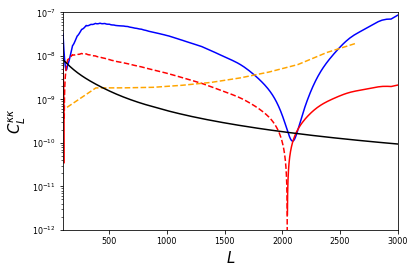

In [20]:
# Break down contributions into n-halo terms?
breakdown = False

plt.figure()
title=''

scaling = experiment.biases['ells']**4 /4.
if get_secondary_bispec_bias:
    # TODO: a factor of 1/2 would make the 2ndary bispec agree better with expectations
    scaling_second_bispec_bias = experiment.biases['second_bispec_bias_ells']**4 /4.
    #scaling_second_bispec_bias[:3] = np.nan

# Split into negative and positive parts for plotting convenience
prim_bispec_1h_pos, prim_bispec_1h_neg = tls.split_positive_negative(experiment.biases[which_bias]['prim_bispec']['1h'])
prim_bispec_2h_pos, prim_bispec_2h_neg = tls.split_positive_negative(experiment.biases[which_bias]['prim_bispec']['2h'])
prim_bispec_tot_pos, prim_bispec_tot_neg = tls.split_positive_negative(experiment.biases[which_bias]['prim_bispec']['2h']+experiment.biases[which_bias]['prim_bispec']['1h'])

trispec_1h_pos, trispec_1h_neg = tls.split_positive_negative(experiment.biases[which_bias]['trispec']['1h'])
trispec_2h_pos, trispec_2h_neg = tls.split_positive_negative(experiment.biases[which_bias]['trispec']['2h'])
trispec_tot_pos, trispec_tot_neg = tls.split_positive_negative(experiment.biases[which_bias]['trispec']['2h']+ experiment.biases[which_bias]['trispec']['1h'])

if get_secondary_bispec_bias:
    sec_bispec_1h_pos, sec_bispec_1h_neg = tls.split_positive_negative(experiment.biases[which_bias]['second_bispec']['1h'])
    #FIXME: for now, ony 1h term for secondary bispec bias
    sec_bispec_tot_pos, sec_bispec_tot_neg = tls.split_positive_negative ( 0 +experiment.biases[which_bias]['second_bispec']['1h'])


plt.plot(experiment.biases['ells'], scaling * trispec_tot_pos, color='b', label=r'{} trispec. bias, tot '.format(which_bias))
plt.plot(experiment.biases['ells'], scaling * trispec_tot_neg, color='b', ls='--')

if breakdown:
    title='_withbreakdown'
    plt.plot(experiment.biases['ells'], scaling * trispec_1h_pos, color='b', label=r'{} trispec. bias, 1h '.format(which_bias), ls=':')
    plt.plot(experiment.biases['ells'], scaling * trispec_1h_neg, color='b', ls=':')

    plt.plot(experiment.biases['ells'], scaling * trispec_2h_pos, color='b', label=r'{} trispec. bias, 2h '.format(which_bias), ls='-.')
    plt.plot(experiment.biases['ells'], scaling * trispec_2h_neg, color='b', ls='-.')

plt.plot(experiment.biases['ells'], scaling * prim_bispec_tot_pos, color='r',label=r'{} prim. bispec. bias, tot'.format(which_bias))
plt.plot(experiment.biases['ells'], scaling * prim_bispec_tot_neg, color='r', ls='--')

if breakdown:
    plt.plot(experiment.biases['ells'], scaling * prim_bispec_1h_pos, color='r', label=r'{} prim. bispec. bias, 1h '.format(which_bias), ls=':')
    plt.plot(experiment.biases['ells'], scaling * prim_bispec_1h_neg, color='r', ls=':')

    plt.plot(experiment.biases['ells'], scaling * prim_bispec_2h_pos, color='r', label=r'{} prim. bispec. bias, 2h '.format(which_bias), ls='-.')
    plt.plot(experiment.biases['ells'], scaling * prim_bispec_2h_neg, color='r', ls='-.')

if get_secondary_bispec_bias:
    plt.plot(experiment.biases['second_bispec_bias_ells'], scaling_second_bispec_bias * sec_bispec_tot_pos, color='orange',label=r'{} sec. bispec. bias, tot'.format(which_bias))
    plt.plot(experiment.biases['second_bispec_bias_ells'], scaling_second_bispec_bias * sec_bispec_tot_neg, color='orange', ls='--')

    if breakdown:
        plt.plot(experiment.biases['second_bispec_bias_ells'], scaling_second_bispec_bias * sec_bispec_1h_pos, color='orange', label=r'{} sec. bispec. bias, 1h '.format(which_bias), ls=':')
        plt.plot(experiment.biases['second_bispec_bias_ells'], scaling_second_bispec_bias * sec_bispec_1h_neg, color='orange', ls=':')

        #plt.plot(experiment.biases['second_bispec_bias_ells'], scaling_second_bispec_bias * sec_bispec_2h_pos, color='gold', label=r'{} sec. bispec. bias, 2h '.format(which_bias), ls='-.')
        #plt.plot(experiment.biases['second_bispec_bias_ells'], scaling_second_bispec_bias * sec_bispec_2h_neg, color='gold', ls='-.')

plt.plot(experiment.cl_unl.ls, 0.05* experiment.cl_unl.ls**4 * experiment.cl_unl.clpp /4.,'k')
plt.yscale('log')
plt.ylabel(r'$C_L^{\kappa\kappa}$',fontsize=15)
plt.xlabel(r'$L$',fontsize=15)
plt.xlim([100,3000])
plt.ylim([1e-12,1e-7])

ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=8)
ax.tick_params(axis='both', which='minor', labelsize=8)

We can save the dictionary of biases to file as

In [116]:
experiment.save_biases()

and later retrieve them as

In [117]:
dict_of_biases = qest.load_dict_of_biases()

Successfully loaded experiment object with properties:

{'ells': array([   0,    1,    2, ..., 2998, 2999, 3000]), 'second_bispec_bias_ells': {}, 'tsz': {'trispec': {'1h': array([0.00000000e+00+0.j, 2.16351424e-10+0.j, 2.16207040e-10+0.j, ...,
       3.68970128e-21+0.j, 3.69730715e-21+0.j, 3.70492088e-21+0.j]), '2h': array([0.00000000e+00+0.00000000e+00j, 1.89782161e-11+9.41773579e-25j,
       3.12650331e-11+1.55149367e-24j, ...,
       6.40463738e-26+8.35398018e-46j, 6.41283229e-26+8.36466933e-46j,
       6.42102506e-26+8.37535568e-46j])}, 'prim_bispec': {'1h': array([           nan           +nanj, 1.71718396e-10+4.26067043e-24j,
       5.72204467e-11+1.41975158e-24j, ...,
       2.18498039e-23+1.42500518e-43j, 2.18483004e-23+1.42490713e-43j,
       2.18467804e-23+1.42480799e-43j]), '2h': array([           nan           +nanj, 1.14259934e-09+2.83501321e-23j,
       6.32492210e-10+1.56933731e-23j, ...,
       5.55929058e-25+3.62567001e-45j, 5.55690311e-25+3.62411294e-45j,
       5.554

We can also use the standard Quicklens implementation of the QEs instead of FFTlog

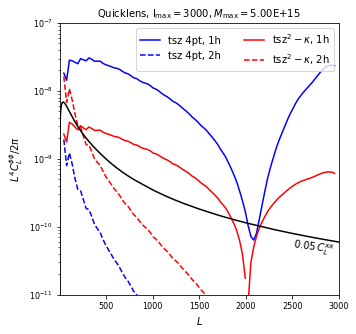

In [11]:
plt.figure(figsize=(5,5))
scaling = experiment.biases['ells']**4 /(2*np.pi)

flat_sky_correction = 1

plt.plot(experiment.biases['ells'][experiment.biases[which_bias]['trispec']['1h']>0],flat_sky_correction**2 *(scaling * experiment.biases[which_bias]['trispec']['1h'])[experiment.biases[which_bias]['trispec']['1h']>0],color='b',label=r'{} 4pt, 1h '.format(which_bias))

plt.plot(experiment.biases['ells'][experiment.biases[which_bias]['trispec']['2h']>0],flat_sky_correction**2 *(scaling * experiment.biases[which_bias]['trispec']['2h'])[experiment.biases[which_bias]['trispec']['2h']>0],color='b',label=r'{} 4pt, 2h '.format(which_bias),ls='--')
plt.plot(experiment.biases['ells'][experiment.biases[which_bias]['trispec']['2h']<0],-flat_sky_correction**2 *(scaling * experiment.biases[which_bias]['trispec']['2h'])[experiment.biases[which_bias]['trispec']['2h']<0],color='b',ls='--')

plt.plot(experiment.biases['ells'][experiment.biases[which_bias]['prim_bispec']['1h']>0],flat_sky_correction *(scaling *experiment.biases[which_bias]['prim_bispec']['1h'])[experiment.biases[which_bias]['prim_bispec']['1h']>0],color='r',label=r'{}$^2-\kappa$, 1h'.format(which_bias))
plt.plot(experiment.biases['ells'][experiment.biases[which_bias]['prim_bispec']['1h']<0],-flat_sky_correction*(scaling *experiment.biases[which_bias]['prim_bispec']['1h'])[experiment.biases[which_bias]['prim_bispec']['1h']<0],color='r')

plt.plot(experiment.biases['ells'][experiment.biases[which_bias]['prim_bispec']['2h']>0],flat_sky_correction*(scaling *experiment.biases[which_bias]['prim_bispec']['2h'])[experiment.biases[which_bias]['prim_bispec']['2h']>0],color='r',label=r'{}$^2-\kappa$, 2h'.format(which_bias),ls='--')
plt.plot(experiment.biases['ells'][experiment.biases[which_bias]['prim_bispec']['2h']<0],-flat_sky_correction*(scaling *experiment.biases[which_bias]['prim_bispec']['2h'])[experiment.biases[which_bias]['prim_bispec']['2h']<0],color='r',ls='--')

plt.annotate(r'$0.05\,C_L^{\kappa \kappa}$', (2500,4e-11), rotation=-8)
plt.plot(experiment.cl_unl.ls, 0.05* experiment.cl_unl.ls**4 * experiment.cl_unl.clpp /(2*np.pi),'k')
plt.yscale('log')
plt.legend(fontsize=10, ncol=2)
plt.ylabel(r'$L^4 C_L^{\phi\phi}/ 2\pi$',fontsize=10)
plt.xlabel(r'$L$',fontsize=10)
plt.title(r'Quicklens, l$_{\mathrm{max}}=$'+str(lmax)+'$, M_{\mathrm{max}}=$'+'{:.2E}'.format(experiment.massCut), fontsize=10)
plt.xlim([2,3000])
plt.ylim([1e-11,1e-7])

ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=8)
ax.tick_params(axis='both', which='minor', labelsize=8)

#plt.savefig('../plots/tsz_bias_for_diff_mass_cuts/1D_reconstructions/biases_lmax{}_masscut{}.pdf'.format(lmax, '1e14'))


# Calculate biases to cross-correlations with galaxies

In [34]:
survey_name = "DESI LRG"

# Add the HOD for the galaxy sample that we will cross-correlating with lensing
z_mean_gal, surface_ngal_of_z_gal = tls.get_DESI_surface_ngal_of_z('lrg')
comov_ngal_gal_persqdeg_interp = np.interp(hm_calc.hcos.zs, z_mean_gal, tls.get_comoving_from_surface_ngal(z_mean_gal, surface_ngal_of_z_gal))
hm_calc.hcos.add_hod(name=survey_name, ngal=comov_ngal_gal_persqdeg_interp) 

Bisection search converged in  20  iterations.


In [46]:
which_bias = 'mixed' #''tsz' or 'cib' or 'mixed'

if which_bias=='tsz':
    hm_calc.get_tsz_cross_biases(experiment, z_mean_gal, surface_ngal_of_z_gal, survey_name=survey_name)
elif which_bias=='cib':
    hm_calc.get_cib_cross_biases(experiment, z_mean_gal, surface_ngal_of_z_gal, survey_name=survey_name)
elif which_bias=='mixed':
    hm_calc.get_mixed_cross_biases(experiment, z_mean_gal, surface_ngal_of_z_gal, survey_name=survey_name)

# Split into negative and positive parts for plotting convenience
cross_w_gals_1h_pos, cross_w_gals_1h_neg = tls.split_positive_negative(experiment.biases[which_bias]['cross_w_gals']['1h'])
cross_w_gals_2h_pos, cross_w_gals_2h_neg = tls.split_positive_negative(experiment.biases[which_bias]['cross_w_gals']['2h'])

# Plot the signal clkg
pgm_1h = hm_calc.hcos.get_power_1halo("nfw", survey_name)
pgm_2h = hm_calc.hcos.get_power_2halo("nfw", survey_name)
Pgm = pgm_1h + pgm_2h
ells = np.linspace(2, 3000, 300)
Cls = hm_calc.hcos.C_kg(ells, hm_calc.hcos.zs, hm_calc.hcos.ks, Pgm, gzs=z_mean_gal, gdndz=surface_ngal_of_z_gal, lzs=1100.)

Launching parallel processes...
Now in parallel loop 0
Now in parallel loop 1
Now in parallel loop 2
Now in parallel loop 3
Now in parallel loop 4
Now in parallel loop 5
Now in parallel loop 6
Now in parallel loop 7
Now in parallel loop 8
Now in parallel loop 9
Now in parallel loop 10
Now in parallel loop 11
Now in parallel loop 12
Now in parallel loop 13
Now in parallel loop 14
Now in parallel loop 15
Now in parallel loop 16
Now in parallel loop 17
Now in parallel loop 18
Now in parallel loop 19


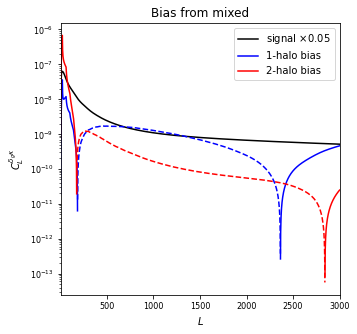

Text(0.5, 1.0, 'Bias from mixed')

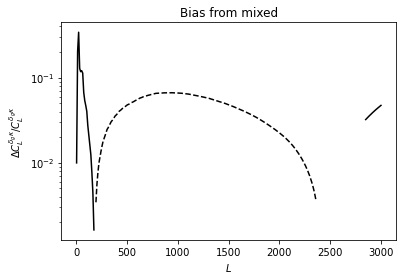

In [47]:
plt.figure(figsize=(5, 5))
scaling = 0.5 * experiment.biases['ells']*(experiment.biases['ells']+1)

plt.plot(ells, 0.05 * Cls, 'k', label=r'signal $\times 0.05$')

plt.plot(experiment.biases['ells'], scaling * cross_w_gals_1h_pos, color='b', label='1-halo bias')
plt.plot(experiment.biases['ells'], scaling * cross_w_gals_1h_neg, color='b', ls='--')

plt.plot(experiment.biases['ells'], scaling * cross_w_gals_2h_pos, color='r', label='2-halo bias')
plt.plot(experiment.biases['ells'], scaling * cross_w_gals_2h_neg, color='r', ls='--')

plt.yscale('log')
plt.xlim([2, 3000])
ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=8)
ax.tick_params(axis='both', which='minor', labelsize=8)
plt.ylabel(r'$C_{L}^{\delta_{g}\kappa}$')
plt.xlabel(r'$L$')
plt.legend()
plt.title('Bias from {}'.format(which_bias))
plt.show()

plt.plot(ells, np.interp(ells, experiment.biases['ells'], scaling * (cross_w_gals_1h_pos + cross_w_gals_2h_pos)) / Cls, color='k')
plt.plot(ells, np.interp(ells, experiment.biases['ells'], scaling * (cross_w_gals_1h_neg + cross_w_gals_2h_neg)) / Cls, color='k', ls='--')
plt.yscale('log')
plt.ylabel(r'$\Delta C_{L}^{\delta_{g}\kappa} / C_{L}^{\delta_{g}\kappa}$')
plt.xlabel(r'$L$')
plt.title('Bias from {}'.format(which_bias))

# Test the FFTlog implementation of the QE

In [44]:
from cosmoblender import qest

We now test the FFTlog implementation of the 1D TT QE against a brute-force calculation of the integrals

Generate a y profile

In [42]:
y = tls.pkToPell(hm_calc.hcos.comoving_radial_distance(hm_calc.hcos.zs[1]),hm_calc.hcos.ks,\
                 hm_calc.hcos.pk_profiles['y'][1,1]*(1-np.exp(-(hm_calc.hcos.ks/hm_calc.hcos.p['kstar_damping']))), ellmax=experiment.lmax)

Calculate the (unnormalised) lensing reconstruction by brute force (this can be very slow)

In [45]:
output_ells = np.linspace(20, 3000, 10)

unnorm_rec_bruteforce = qest.get_brute_force_unnorm_TT_qe(output_ells, y, experiment.cltt_tot, experiment.ls, experiment.cl_len.cltt, experiment.lmax)

KeyboardInterrupt: 

Now calculate it using FFTlog

In [101]:
output_ells_refined =  np.arange(3000)

# FFTlog parameters
N_l= 2*4096#2*4096
lmin= .000135 #0.000135
alpha= -1.35#-1.35

unnorm_rec_fftlog = qest.get_TT_QE(True, output_ells_refined, y, experiment.qe_norm, experiment.pix,
                                   experiment.lmax, experiment.cltt_tot, experiment.ls, experiment.cl_len.cltt,
                                   N_l=N_l, lmin=lmin, alpha=alpha)

Compare the two

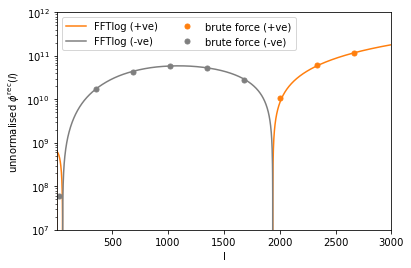

In [102]:
plt.semilogy(output_ells_refined, unnorm_rec_fftlog, color='tab:orange', label='FFTlog (+ve)')
plt.semilogy(output_ells_refined, - unnorm_rec_fftlog, color='tab:gray', label='FFTlog (-ve)')

plt.semilogy(output_ells, unnorm_rec_bruteforce, marker='o', lw=0, markersize=5, color='tab:orange', label='brute force (+ve)')
plt.semilogy(output_ells, -unnorm_rec_bruteforce, marker='o', markersize=5, lw=0, color='tab:gray', label='brute force (-ve)')

plt.xlim([1, 3000])
plt.ylim([1e7, 1e12])
plt.xlabel('l')
plt.ylabel(r'unnormalised $\phi^{\mathrm{rec}} (l)$')
plt.legend(loc='upper left', ncol=2)


# Calculate the biases to B-mode delensing

In [170]:
SO_5e15 = qest.experiment(6., 1.5, 3000, massCut_Mvir=5e15, freq_GHz=freq_GHz)
SO_1e15 = qest.experiment(6., 1.5, 3000, massCut_Mvir=1e15, freq_GHz=freq_GHz)
SO_5e14 = qest.experiment(6., 1.5, 3000, massCut_Mvir=5e14, freq_GHz=freq_GHz)

(-1e-07, 1.5e-07)

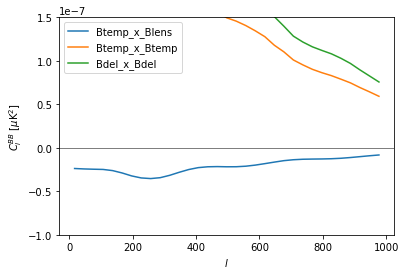

In [171]:
ells, cl_Btemp_x_Blens_bias, cl_Btemp_x_Btemp_bias, cl_Bdel_x_Bdel_bias = hm_calc.get_bias_to_delensed_clbb(SO_5e15)

plt.plot(ells, cl_Btemp_x_Blens_bias, label=r'Btemp_x_Blens')
plt.plot(ells, cl_Btemp_x_Btemp_bias, label=r'Btemp_x_Btemp')
plt.plot(ells, cl_Bdel_x_Bdel_bias, label=r'Bdel_x_Bdel')
plt.ylabel(r'$C_l^{BB}$ [$\mu$K$^2$]')
plt.xlabel(r'$l$')
plt.legend()
plt.axhline(0, color='k', lw=0.5)
plt.ylim([-1e-7,1.5e-7])

(-1e-07, 1.5e-07)

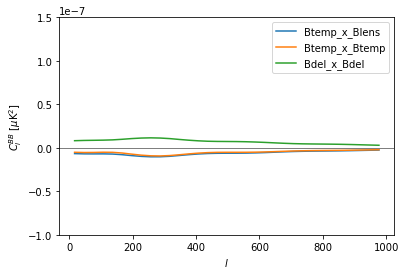

In [172]:
ells, cl_Btemp_x_Blens_bias_SO_1e15, cl_Btemp_x_Btemp_bias_SO_1e15, cl_Bdel_x_Bdel_bias_SO_1e15 = hm_calc.get_bias_to_delensed_clbb(SO_5e14)

plt.plot(ells, cl_Btemp_x_Blens_bias_SO_1e15, label=r'Btemp_x_Blens')
plt.plot(ells, cl_Btemp_x_Btemp_bias_SO_1e15, label=r'Btemp_x_Btemp')
plt.plot(ells, cl_Bdel_x_Bdel_bias_SO_1e15, label=r'Bdel_x_Bdel')
plt.ylabel(r'$C_l^{BB}$ [$\mu$K$^2$]')
plt.xlabel(r'$l$')
plt.legend()
plt.axhline(0, color='k', lw=0.5)
plt.ylim([-1e-7,1.5e-7])

(-1e-07, 1.5e-07)

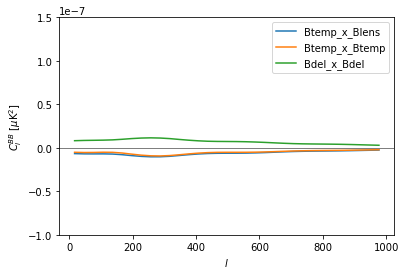

In [173]:
ells, cl_Btemp_x_Blens_bias_SO_5e14, cl_Btemp_x_Btemp_bias_SO_5e14, cl_Bdel_x_Bdel_bias_SO_5e14 = hm_calc.get_bias_to_delensed_clbb(SO_5e14)

plt.plot(ells, cl_Btemp_x_Blens_bias_SO_5e14, label=r'Btemp_x_Blens')
plt.plot(ells, cl_Btemp_x_Btemp_bias_SO_5e14, label=r'Btemp_x_Btemp')
plt.plot(ells, cl_Bdel_x_Bdel_bias_SO_5e14, label=r'Bdel_x_Bdel')
plt.ylabel(r'$C_l^{BB}$ [$\mu$K$^2$]')
plt.xlabel(r'$l$')
plt.legend()
plt.axhline(0, color='k', lw=0.5)
plt.ylim([-1e-7,1.5e-7])